In [2]:
import importlib
import os
import fnmatch
import numpy as np
from sklearn.model_selection import train_test_split
from collections import Counter
import csv
from sklearn import tree
import sys
sys.stdout.flush()
import math
import matplotlib.pyplot as plt
from matplotlib.table import Table
import segment_cluster as sc
import importlib
importlib.reload(sc)
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()

(25, 4, 626.2380644738986, 452.24089083906387, 855.4963262320804)


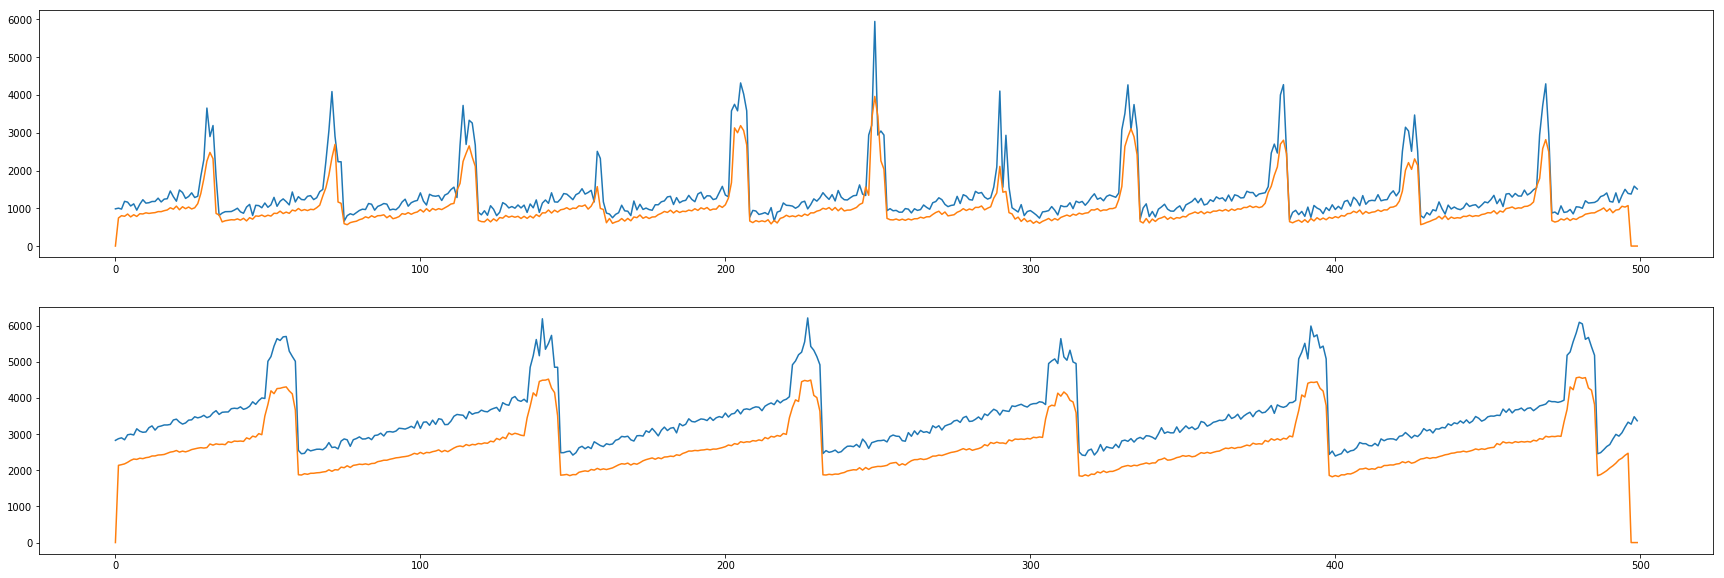

In [23]:
importlib.reload(sc)
np.random.seed(0)
rho_file=np.loadtxt("synthetic_rhos.csv", delimiter=',')
rho_train, rho_valid, rho_train_ids, rho_valid_ids= train_test_split(rho_file[0:60], list(range(len(rho_file))) ,test_size=0.25)
seg_slide=1
seg_lens=[4]
k_clusters=[25]
for k_cluster in k_clusters:
    for seg_len in seg_lens:
        all_train_segments=[]
        for rho in rho_train:
            train_segments=sc.segmentation(rho, seg_len, seg_slide, time_stamps=False)
            all_train_segments.append(train_segments)
        all_train_segments=np.vstack(all_train_segments)
        
        cluster=KMeans(n_clusters=k_cluster, random_state=0)
        cluster.fit(all_train_segments)
        
        reco_error=[]
        for n_rho, rho in enumerate(rho_valid):
            valid_segments= sc.segmentation(rho, seg_len, int(seg_len/2) , time_stamps=False)
            reco = sc.reconstruct(valid_segments, rho, cluster, rel_offset=False, seg_slide=int(seg_len/2))
            error=np.sqrt(np.mean((rho[seg_len:-seg_len]-reco[seg_len:-seg_len])**2))
            reco_error.append((n_rho, error))
        print((k_cluster,seg_len, np.mean(np.array(reco_error)[:,1]),np.min(np.array(reco_error)[:,1]),np.max(np.array(reco_error)[:,1])), flush=True)
        best_reco_ind=np.argmin(np.array(reco_error)[:,1])
        worst_reco_ind=np.argmax(np.array(reco_error)[:,1])
        
        plt.gcf().set_size_inches(30,10)
        plt.subplot(2,1,1)
        valid_segments= sc.segmentation(rho_valid[best_reco_ind], seg_len, int(seg_len/2) , time_stamps=False)
        reco = sc.reconstruct(valid_segments, rho_valid[best_reco_ind], cluster, rel_offset=False, seg_slide=int(seg_len/2))
        plt.plot(rho_valid[best_reco_ind])
        plt.plot(reco)
        plt.subplot(2,1,2)
        valid_segments= sc.segmentation(rho_valid[worst_reco_ind], seg_len, int(seg_len/2) , time_stamps=False)
        reco = sc.reconstruct(valid_segments, rho_valid[worst_reco_ind], cluster, rel_offset=False, seg_slide=int(seg_len/2))
        plt.plot(rho_valid[worst_reco_ind])
        plt.plot(reco)
        plt.show()
        #(10, 50, 2531.3593310136143, 1613.8908623585137, 3483.5607932896746)

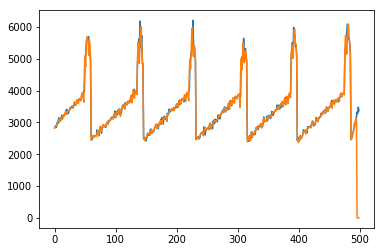

In [30]:
importlib.reload(sc)
valid_segments= sc.segmentation(rho_valid[worst_reco_ind], seg_len, int(seg_len) , time_stamps=False)
reco = sc.reconstruct(valid_segments, rho_valid[worst_reco_ind], cluster, rel_offset=False, seg_slide=int(seg_len))
plt.plot(rho_valid[worst_reco_ind])
plt.plot(reco)
plt.show()

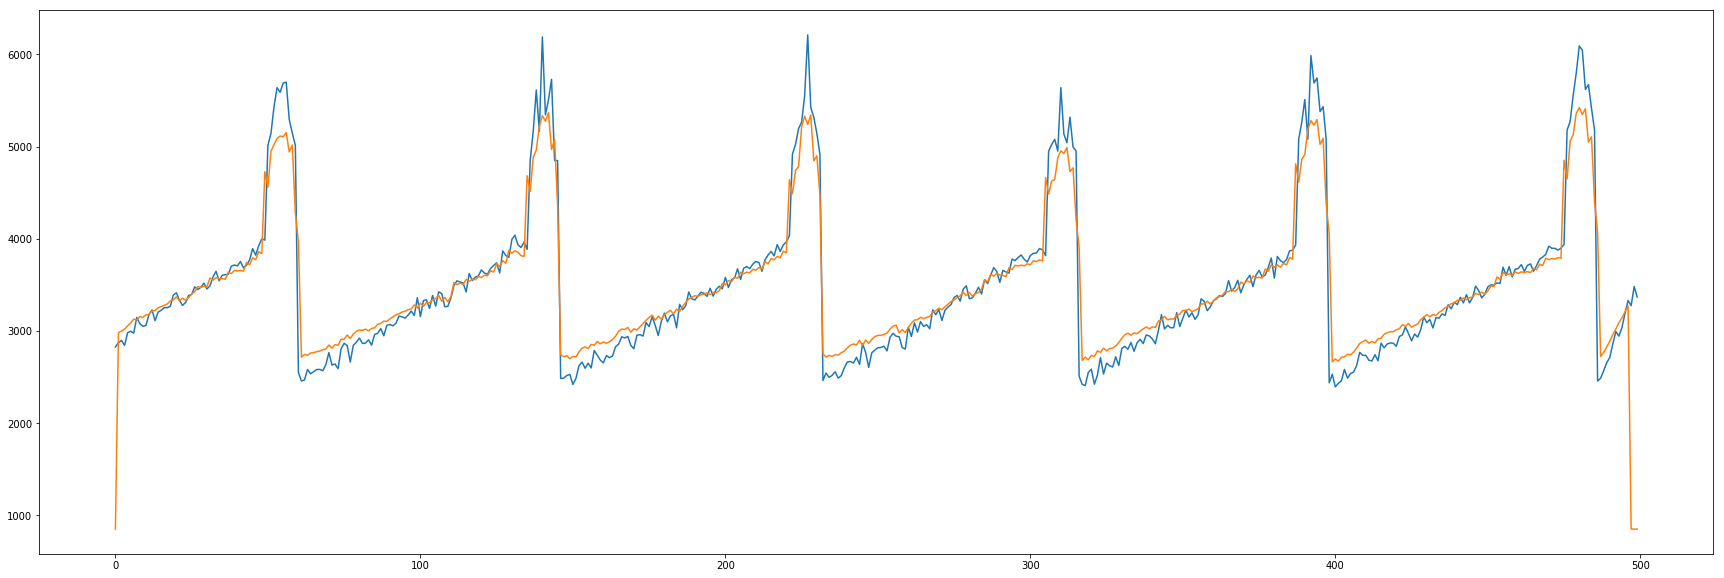

2612.9044530283472 3462.2029998136118


In [9]:
plt.gcf().set_size_inches(30,10)
plt.plot(rho_valid[worst_reco_ind])
plt.plot(reco-np.mean(reco)+np.mean(rho_valid[worst_reco_ind]))
plt.show()
print(np.mean(reco), np.mean(rho_valid[worst_reco_ind]))

In [54]:
importlib.reload(sc)
rho_file=np.loadtxt("synthetic_rhos.csv",  delimiter=',')
rho_train, rho_valid, rho_train_ids, rho_valid_ids= train_test_split(rho_file, list(range(len(rho_file))), test_size=0.25)

##train the model
#loop throught the light curves of a given class and segments them
all_train_segments=[]
for rho in rho_train:
    train_segments=sc.segmentation(rho, 100, 1, time_stamps=False)
    all_train_segments.append(train_segments)
all_train_segments=np.vstack(all_train_segments)
#cluster the segments
cluster=KMeans(n_clusters=50, random_state=0)
cluster.fit(all_train_segments)



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=50, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

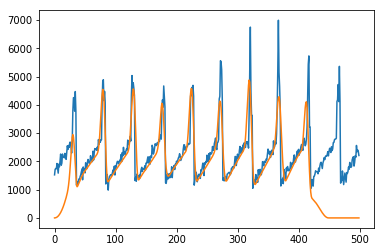

(0, 546.6879602862905)


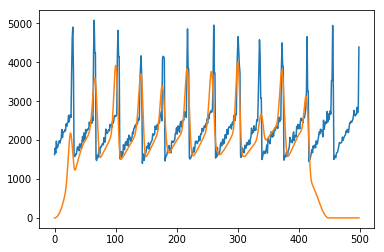

(1, 538.9635104491316)


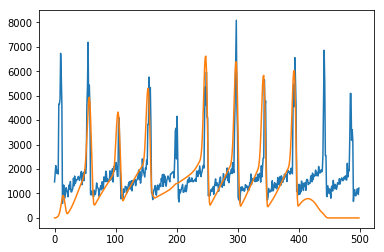

(2, 921.3014012727018)


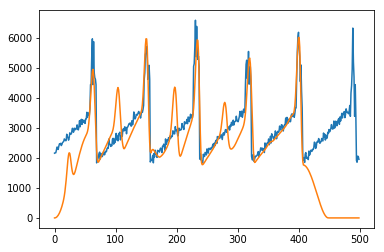

(3, 575.4327914295038)


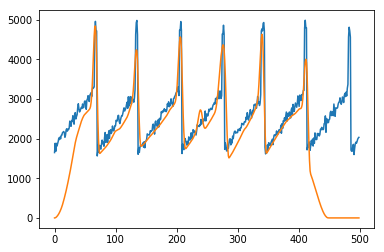

(4, 414.39167877702977)


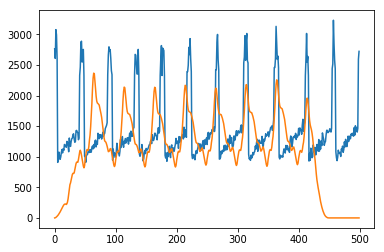

(5, 509.10523905830865)


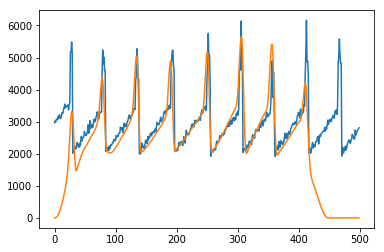

(6, 488.2877910359758)


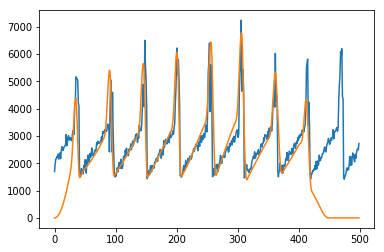

(7, 627.6910912984551)


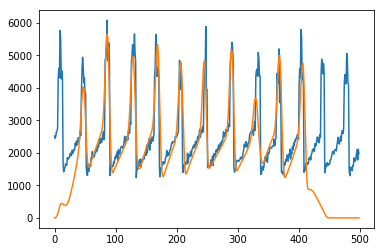

(8, 600.2326134654393)


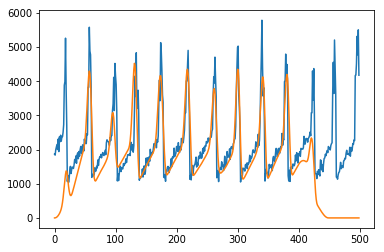

(9, 564.702630248034)


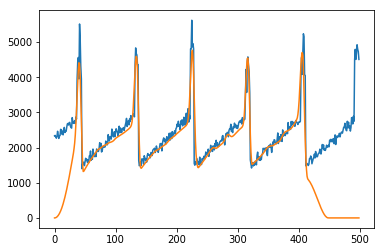

(10, 255.31311351655015)


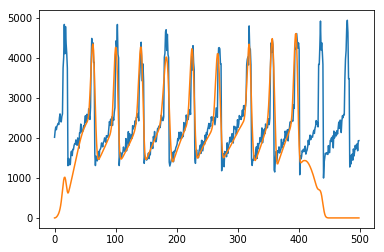

(11, 450.7285138715407)


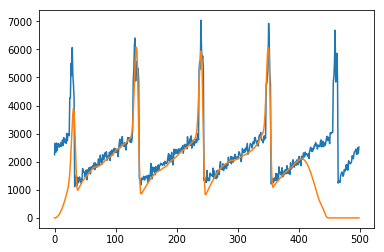

(12, 383.7600501696604)


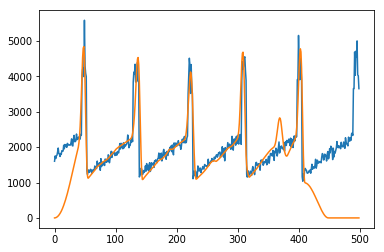

(13, 429.95691875210775)


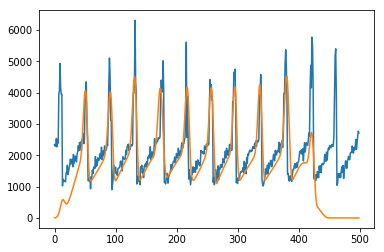

(14, 618.0507762535057)


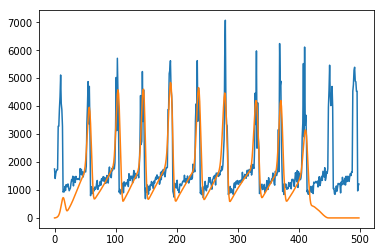

(15, 688.0826676112702)


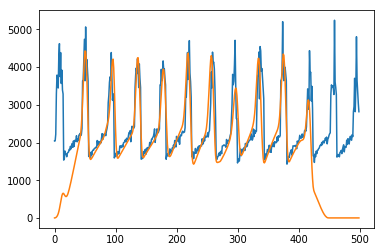

(16, 476.38112596694776)


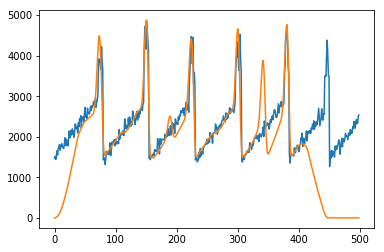

(17, 415.34668718905715)


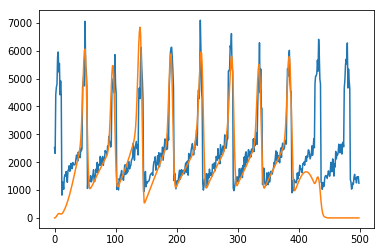

(18, 747.6482054403085)


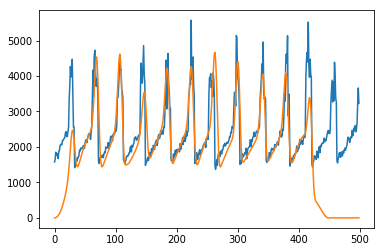

(19, 560.6653141544354)


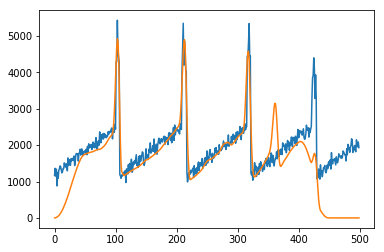

(20, 395.55609509458)


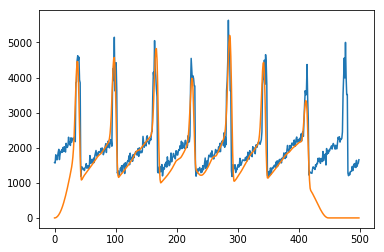

(21, 490.92799880831797)


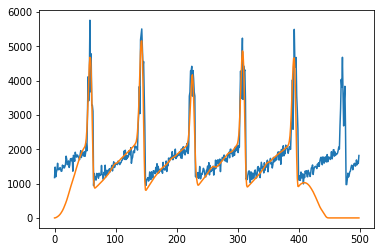

(22, 422.16538120272844)


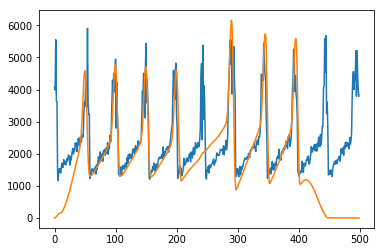

(23, 713.136132597122)


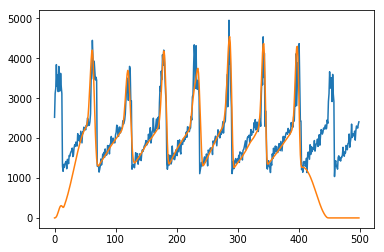

(24, 343.9372383073638)


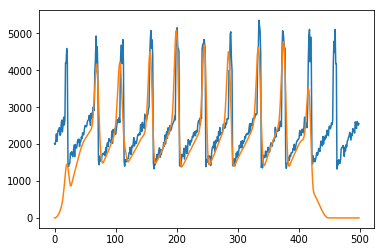

(25, 594.4254779983796)


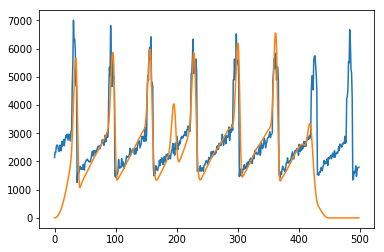

(26, 542.5051069473603)


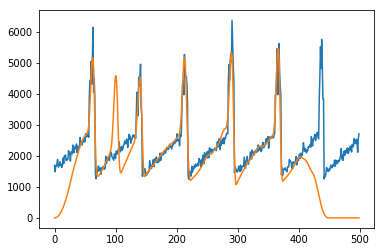

(27, 451.23983400876295)


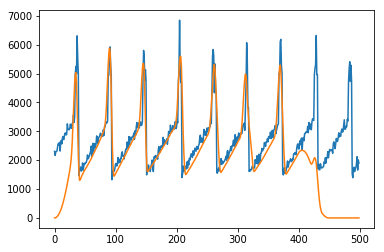

(28, 560.8204655818461)


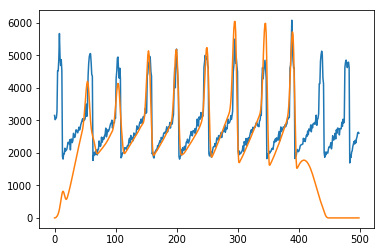

(29, 477.26396153781565)


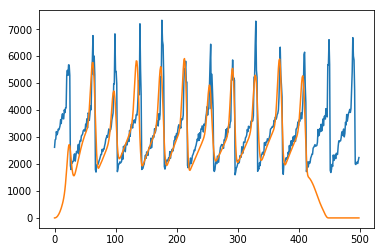

(30, 731.5412621824617)


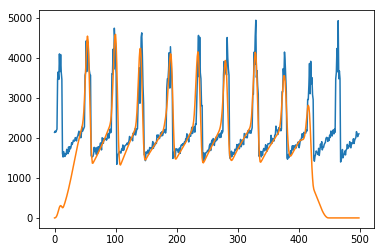

(31, 417.6737435677346)


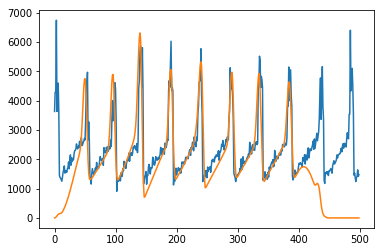

(32, 616.0094947173701)


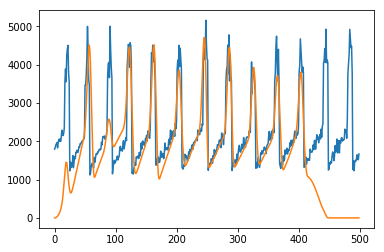

(33, 495.12896328718466)


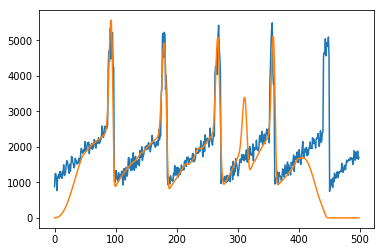

(34, 445.8902370334201)


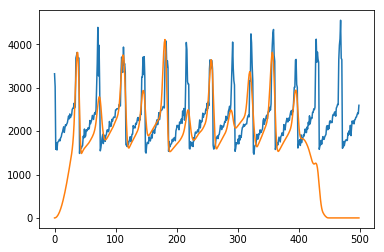

(35, 446.7513849480218)


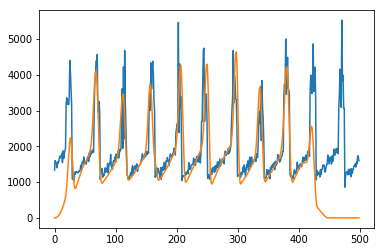

(36, 650.5201900579424)


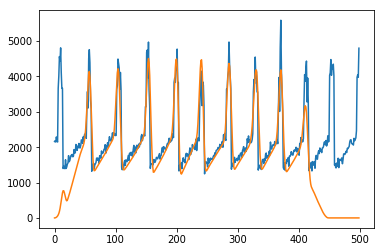

(37, 404.46432162943603)


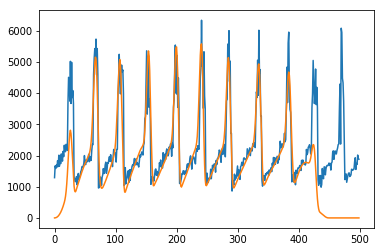

(38, 573.8909607658233)


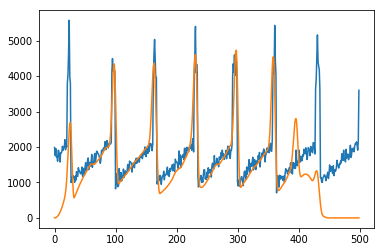

(39, 550.0936260579654)


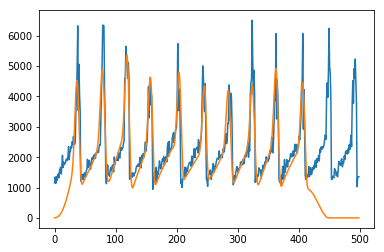

(40, 537.2362435669469)


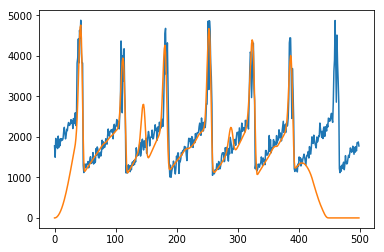

(41, 390.44739818308085)


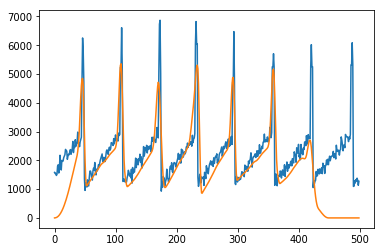

(42, 734.4220038946528)


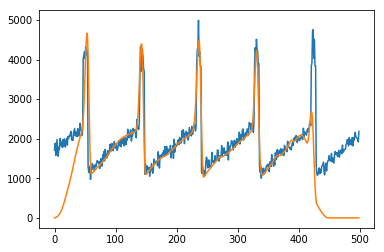

(43, 260.9626973528093)


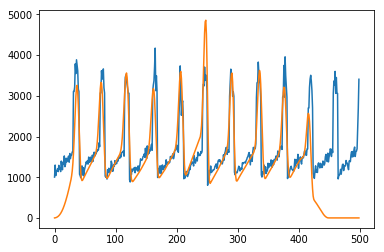

(44, 430.5581891259632)


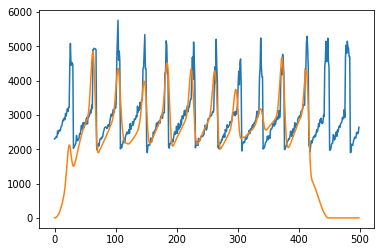

(45, 547.5603654876904)


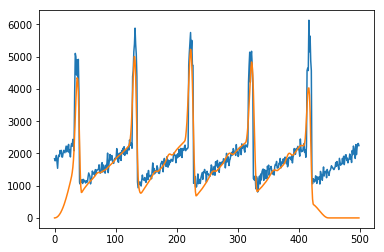

(46, 413.45553775171476)


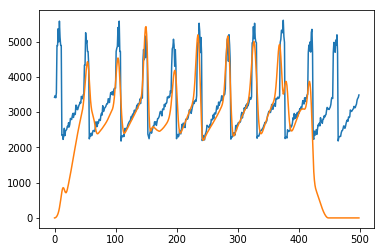

(47, 553.7691940172208)


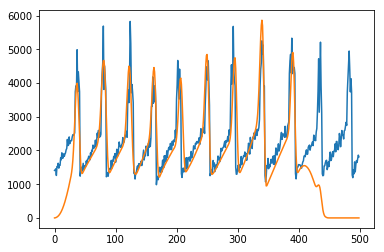

(48, 611.9852477391266)


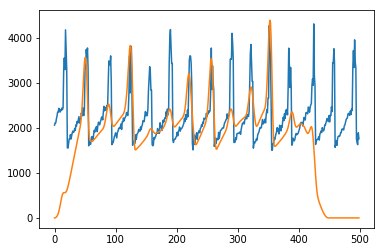

(49, 522.411182903894)


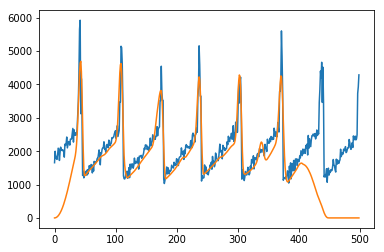

(50, 388.78031856428095)


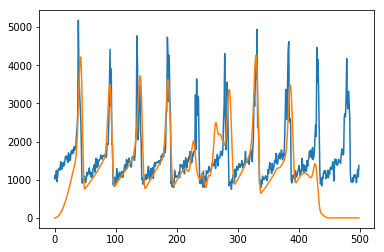

(51, 655.1449402370423)


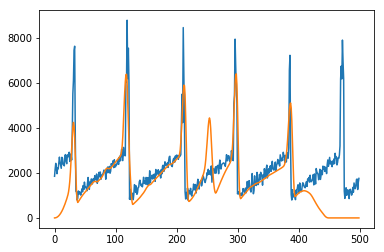

(52, 921.8559453956268)


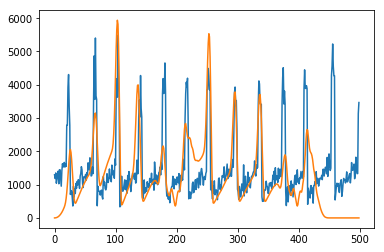

(53, 872.8203088359545)


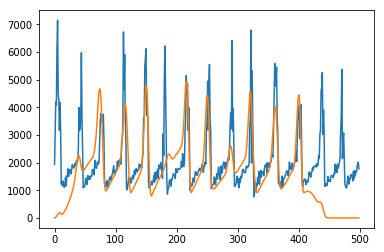

(54, 862.139878890297)


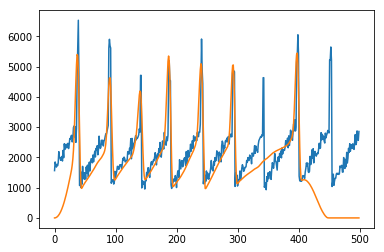

(55, 636.4931125216749)


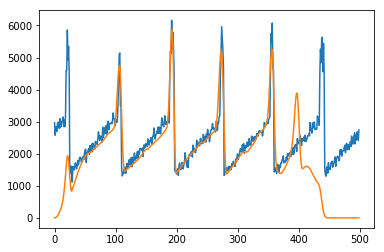

(56, 429.9459749866073)


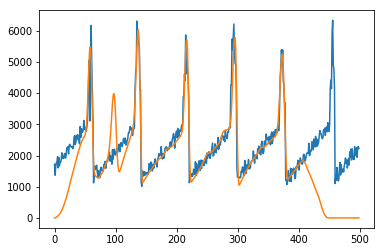

(57, 357.67516196092294)


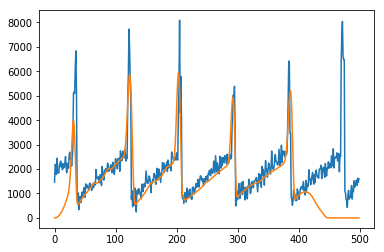

(58, 762.5414935173416)


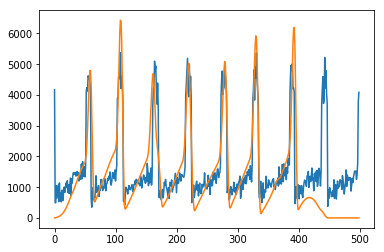

(59, 815.1867672906003)


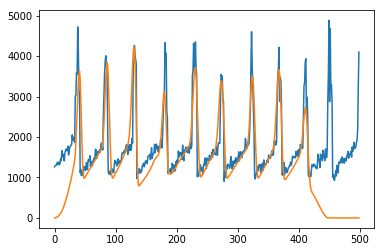

(60, 427.14890628356807)


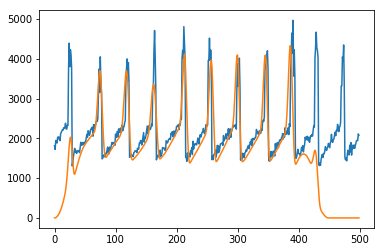

(61, 570.476330004941)


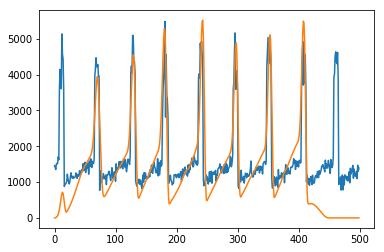

(62, 631.6138498098614)


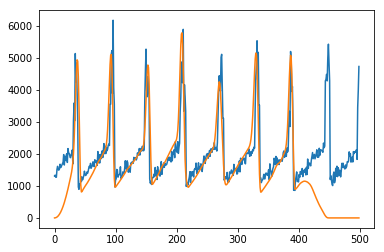

(63, 594.0875447621063)


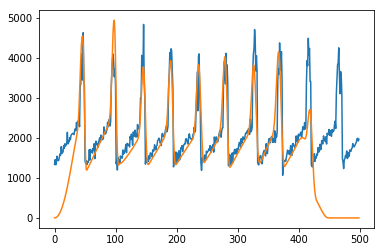

(64, 410.3294468714312)


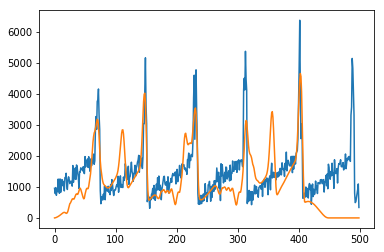

(65, 731.9676110753934)


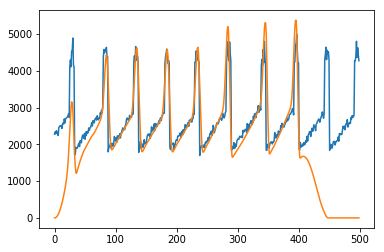

(66, 454.1840660628817)


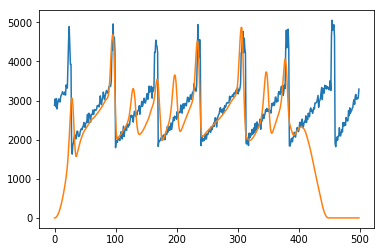

(67, 530.9542451574977)


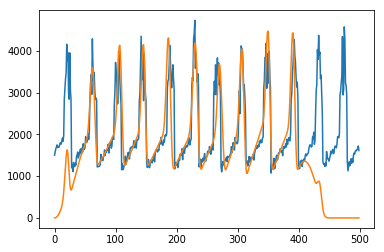

(68, 595.8497683145721)


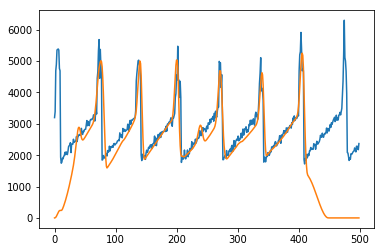

(69, 406.42332542529556)


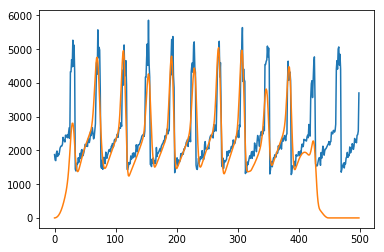

(70, 578.2274562449398)


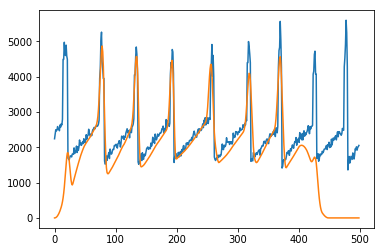

(71, 430.9854041550903)


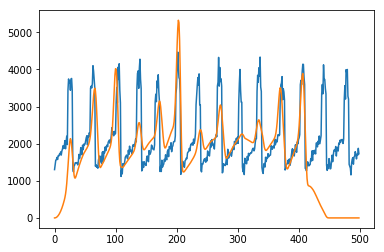

(72, 699.5510211283427)


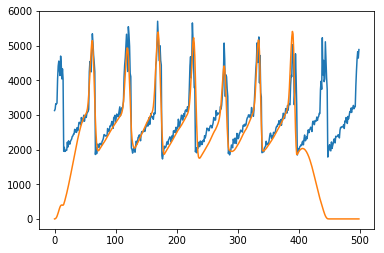

(73, 440.63501158547683)


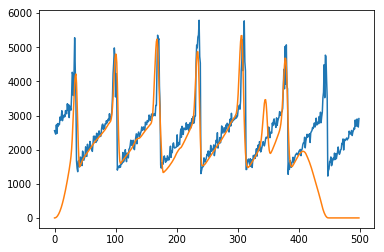

(74, 580.7880873042062)


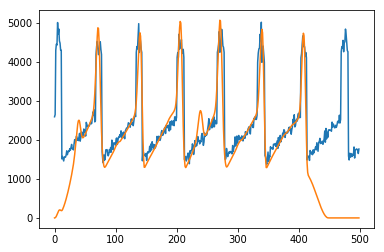

(75, 422.62470974053497)


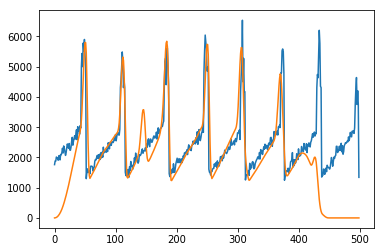

(76, 606.060838836375)


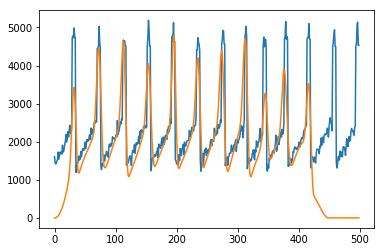

(77, 666.9964130822733)


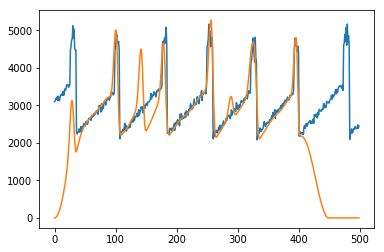

(78, 434.3381923551811)


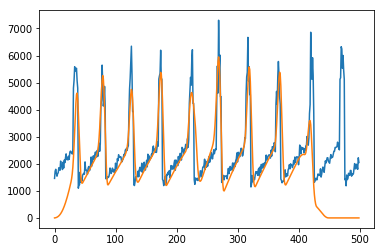

(79, 693.2293086911465)


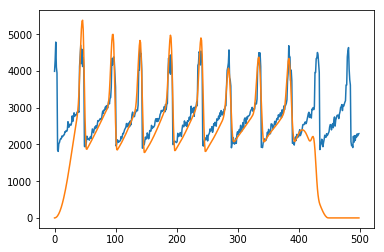

(80, 329.26338443673296)


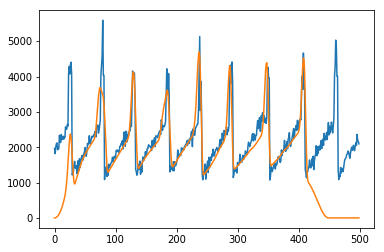

(81, 431.7341081517595)


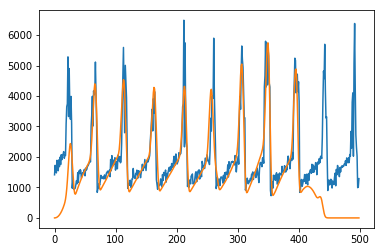

(82, 576.5687681682108)


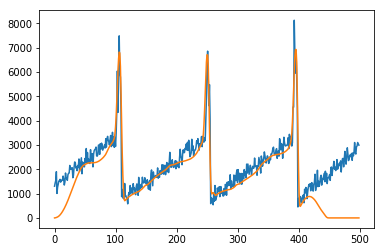

(83, 498.02278446104117)


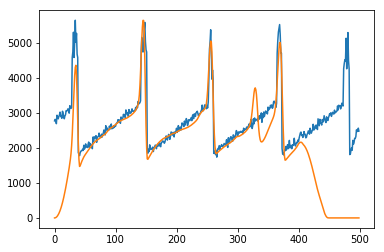

(84, 397.9289283357057)


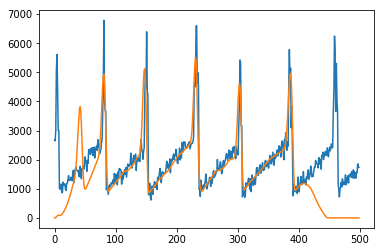

(85, 579.0764446445078)


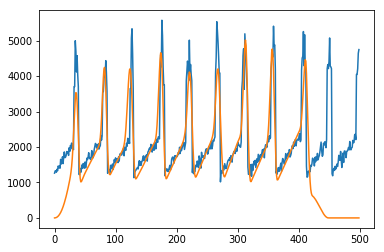

(86, 558.8137682800376)


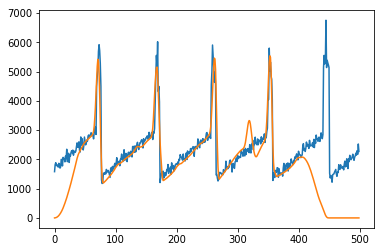

(87, 391.8145482860089)


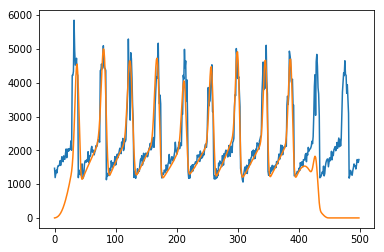

(88, 410.3115944068436)


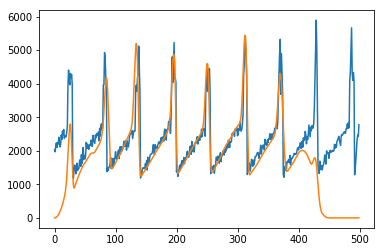

(89, 470.41891703673934)


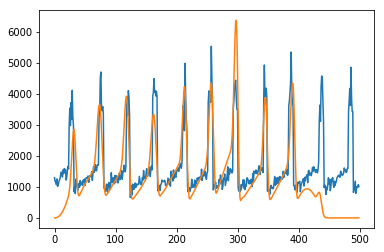

(90, 695.1183270275916)


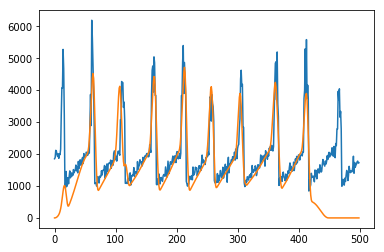

(91, 556.1737508225009)


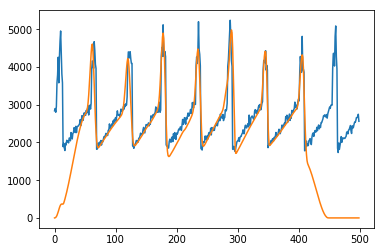

(92, 376.557105900408)


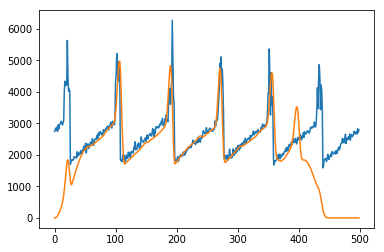

(93, 497.43848214710647)


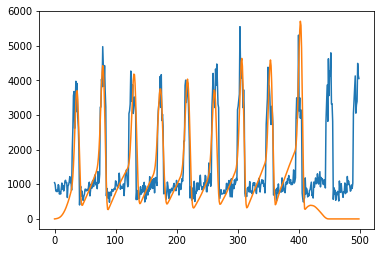

(94, 599.5631042265012)


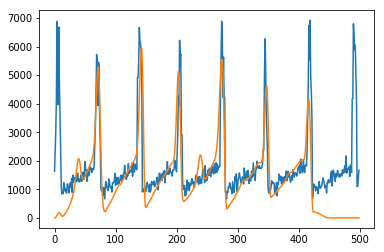

(95, 776.5925359296908)


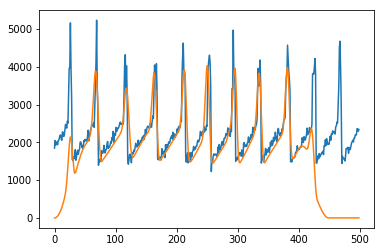

(96, 462.72797589920236)


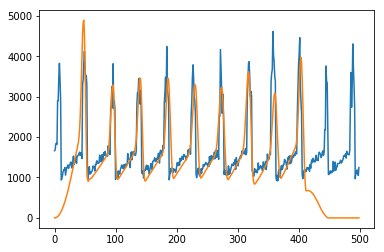

(97, 496.23047175465547)


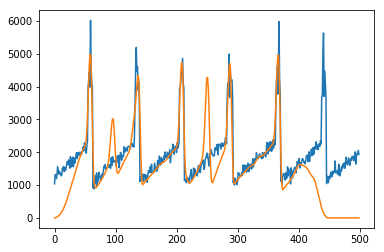

(98, 511.8537070939581)


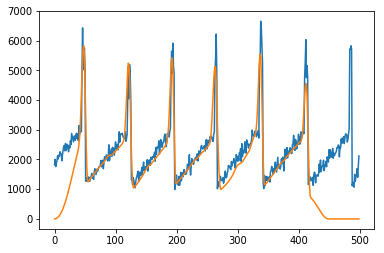

(99, 512.655196162166)


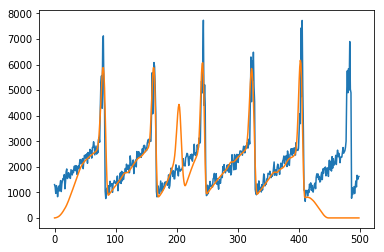

(100, 590.3867955574387)


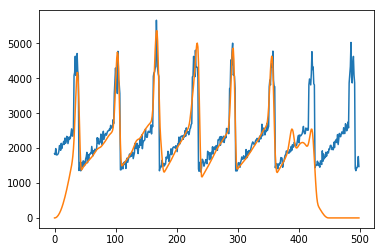

(101, 401.783437318104)


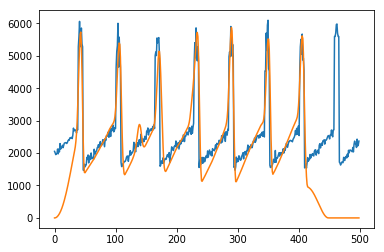

(102, 618.3242836119884)


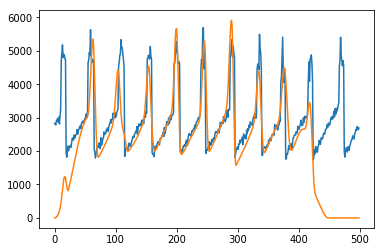

(103, 636.9533148682164)


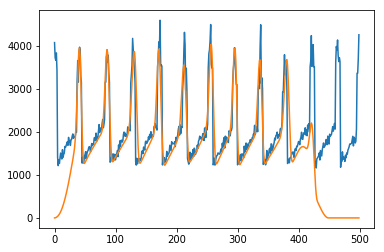

(104, 426.1201942029509)


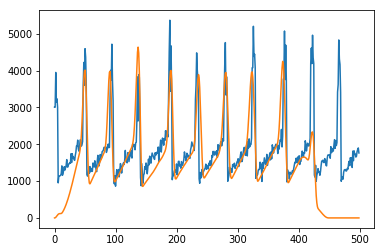

(105, 649.0648778981879)


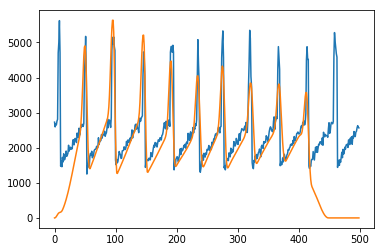

(106, 550.5450341133874)


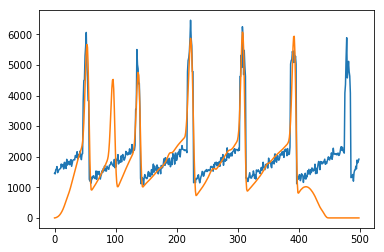

(107, 457.24823578910315)


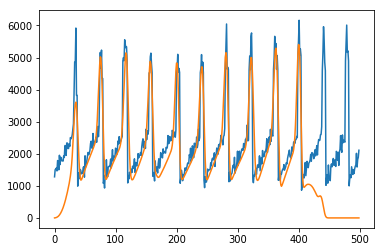

(108, 649.7666911897826)


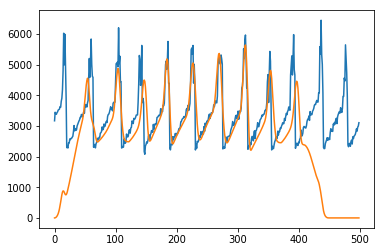

(109, 694.5052108899714)


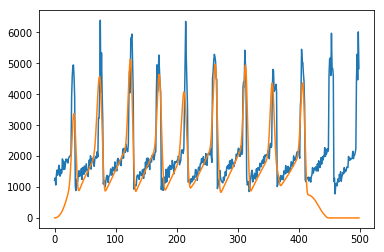

(110, 673.5330092122997)


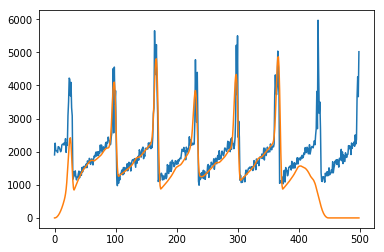

(111, 444.8456670110737)


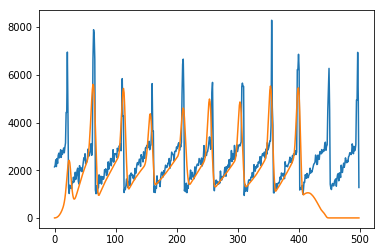

(112, 873.2034428286869)


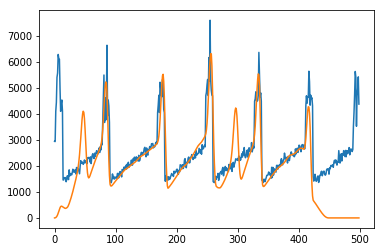

(113, 572.9940460362178)


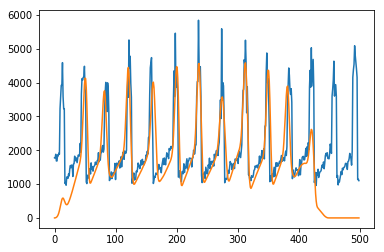

(114, 679.4533318070702)


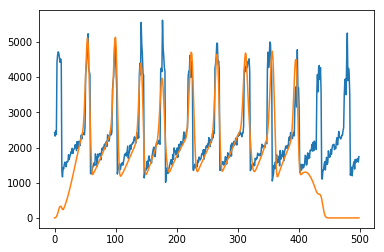

(115, 678.6613614024347)


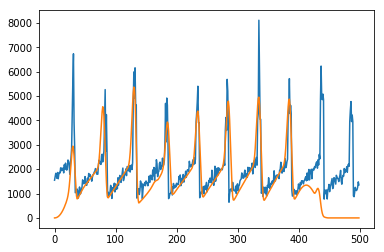

(116, 695.8040002751337)


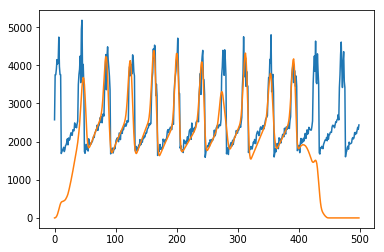

(117, 386.7366563624799)


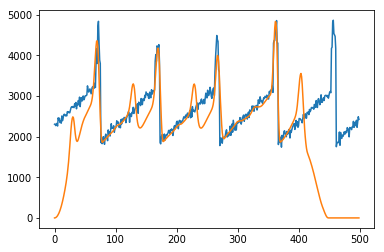

(118, 337.3939922921494)


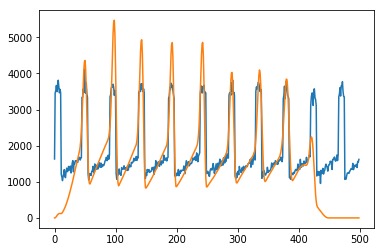

(119, 468.41019263356725)


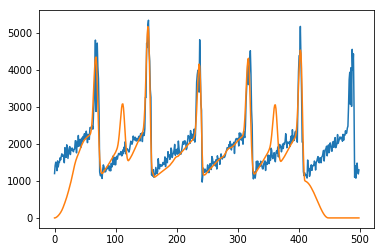

(120, 392.36170749944165)


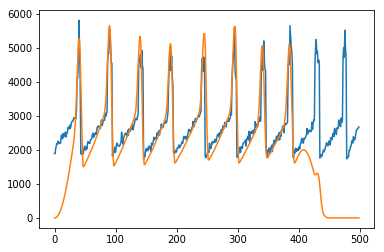

(121, 526.6125440223933)


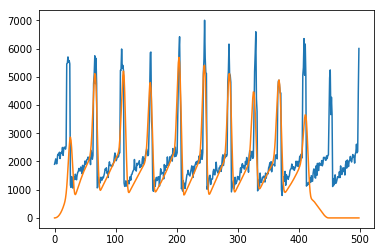

(122, 786.80354542869)


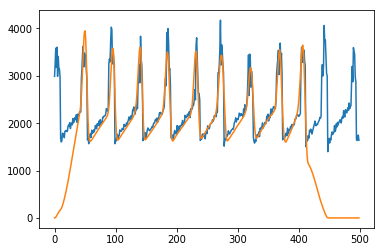

(123, 227.48321674195307)


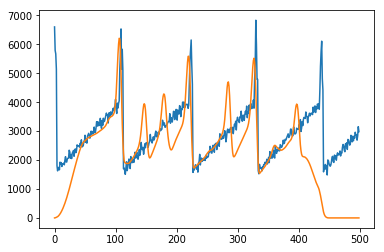

(124, 784.2745945897437)


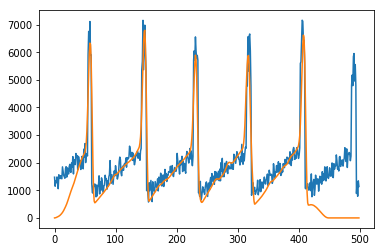

(125, 514.6085291553967)


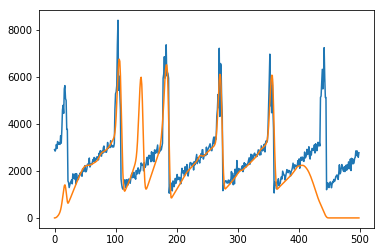

(126, 807.177991728841)


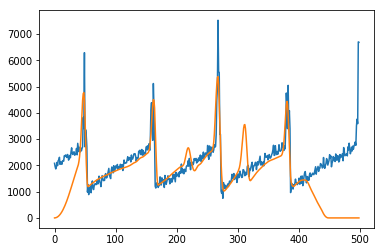

(127, 494.9150750350472)


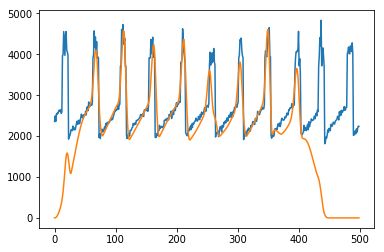

(128, 384.4744009307748)


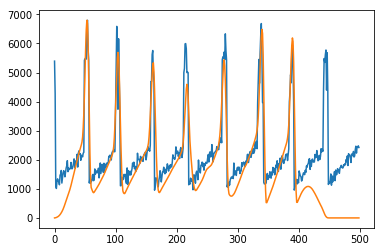

(129, 754.902227797062)


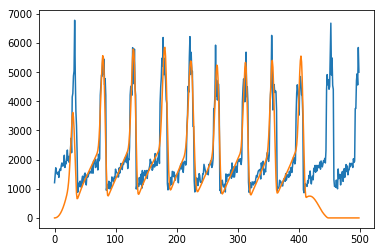

(130, 576.9021749823786)


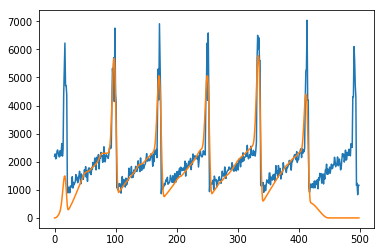

(131, 454.7400998519789)


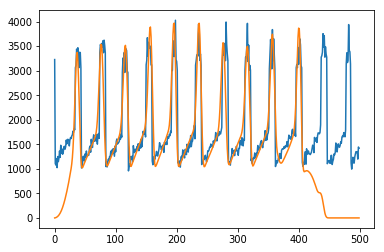

(132, 420.35775363800366)


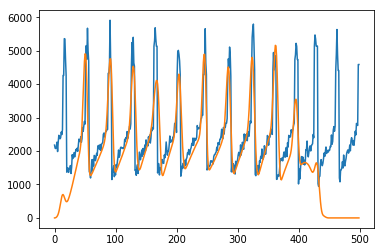

(133, 719.0943806695368)


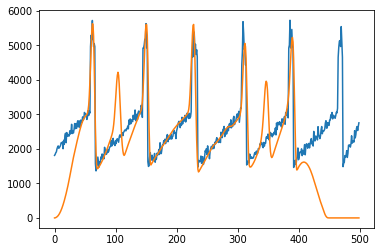

(134, 660.7731723376085)


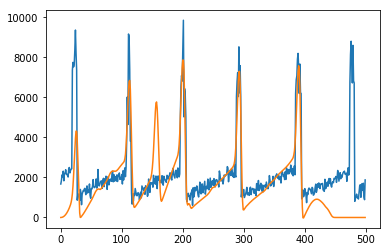

(135, 928.7119048111956)


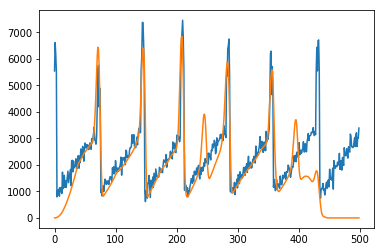

(136, 706.3315334408866)


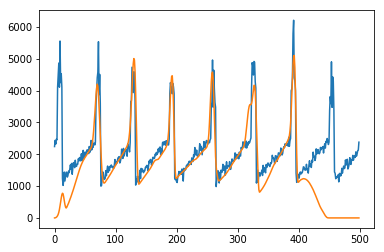

(137, 467.2758288966178)


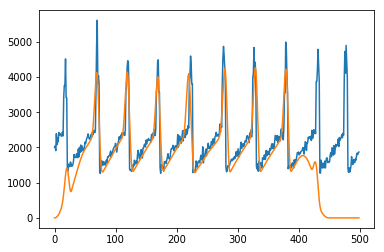

(138, 501.826083536217)


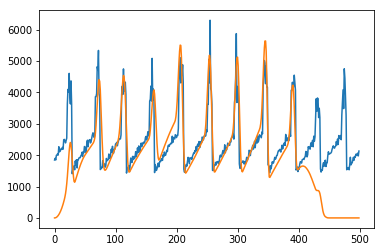

(139, 519.1535727587794)


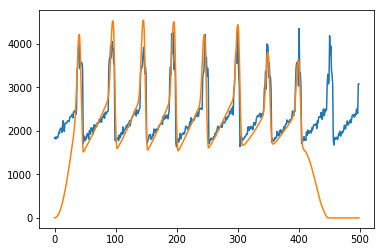

(140, 327.7100103533014)


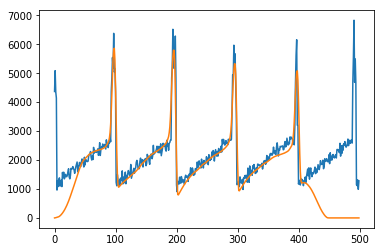

(141, 374.73028819828676)


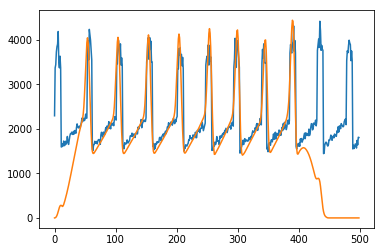

(142, 422.8776805625229)


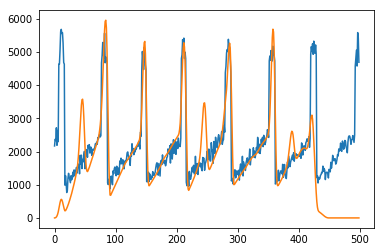

(143, 525.3020582644427)


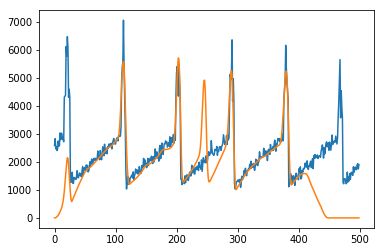

(144, 574.8442021376339)


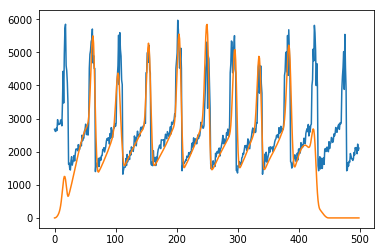

(145, 613.528869137828)


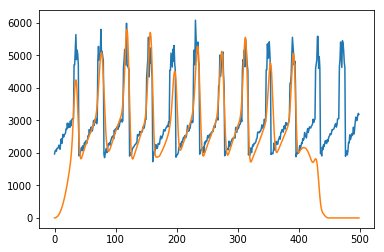

(146, 612.0972176722045)


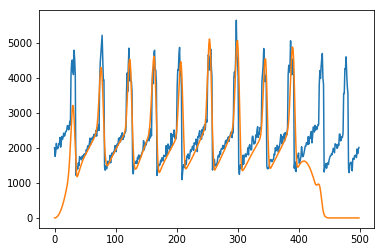

(147, 555.6509018346168)


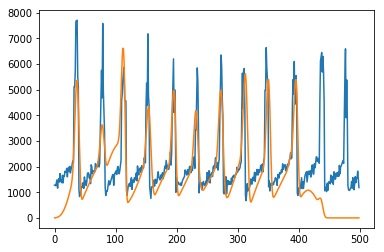

(148, 1011.2542430045955)


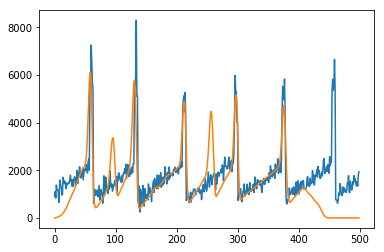

(149, 793.4771825098007)


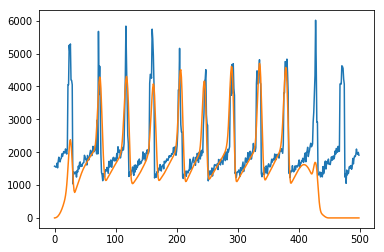

(150, 596.2944855014324)


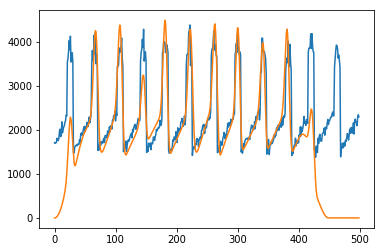

(151, 431.34326756279586)


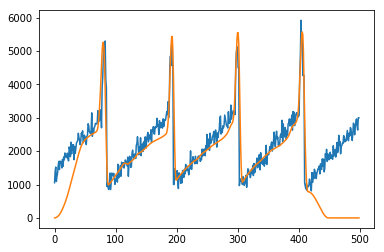

(152, 427.34835484624597)


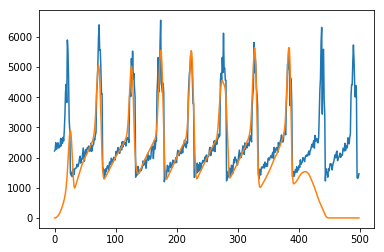

(153, 485.492178118249)


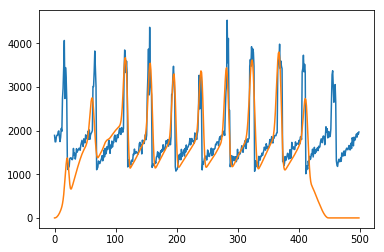

(154, 409.119421748239)


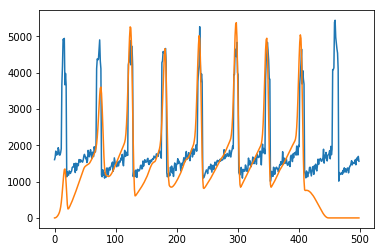

(155, 546.1820391566367)


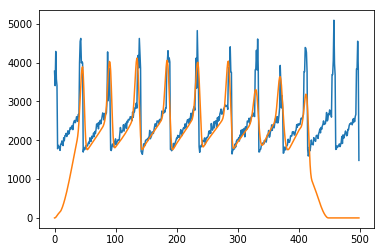

(156, 418.42475247671297)


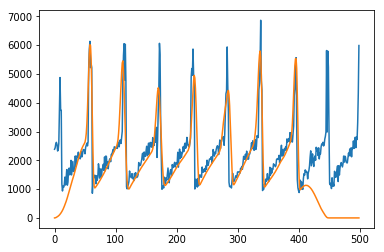

(157, 791.0466800450487)


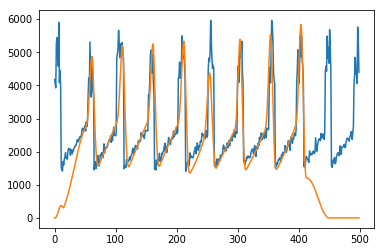

(158, 698.8914954998284)


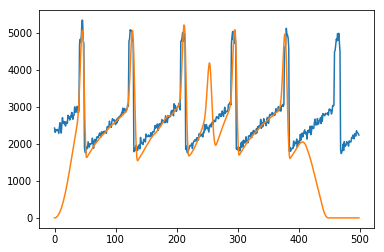

(159, 557.7708218331404)


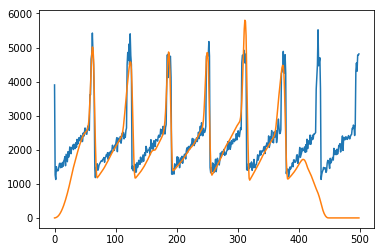

(160, 506.7368526848499)


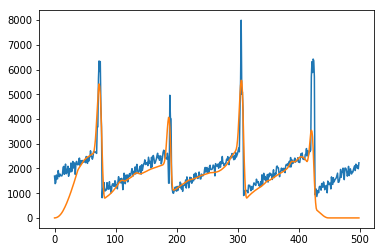

(161, 431.4425584743069)


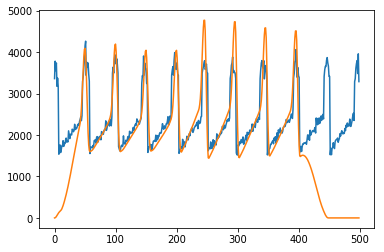

(162, 431.5275133166089)


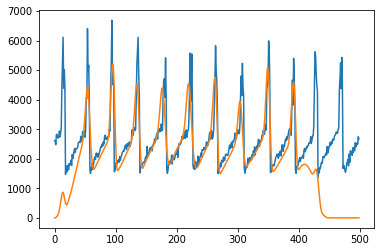

(163, 595.7663650771636)


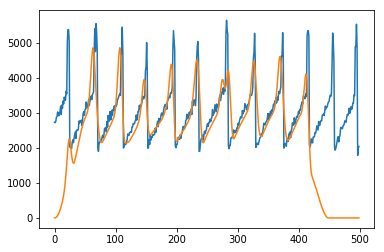

(164, 577.5323860998419)


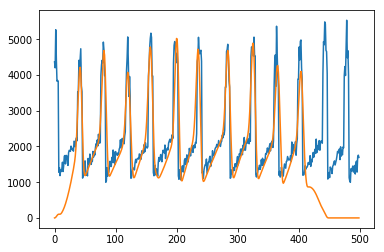

(165, 589.905177839277)


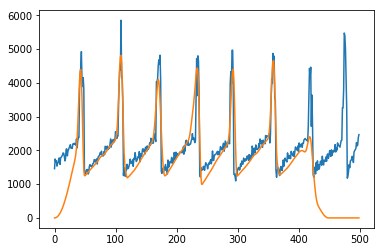

(166, 439.17279259993404)


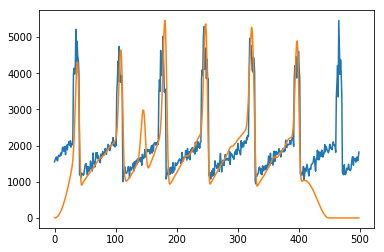

(167, 571.6904335125474)


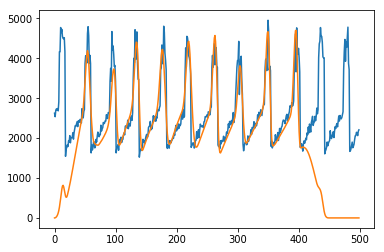

(168, 351.6815597486184)


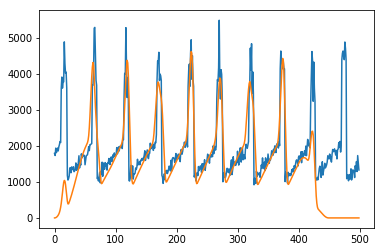

(169, 505.95168488891676)


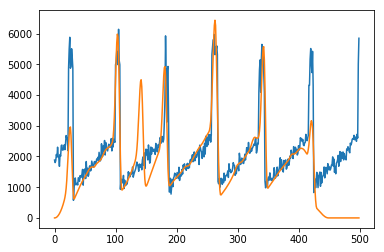

(170, 711.1952038081868)


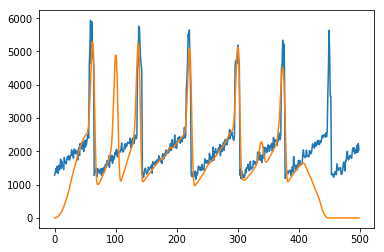

(171, 608.0107840917437)


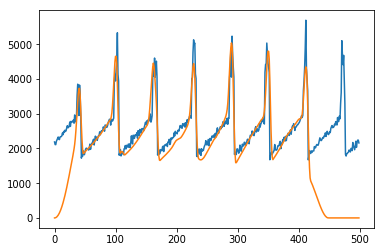

(172, 371.24203383801586)


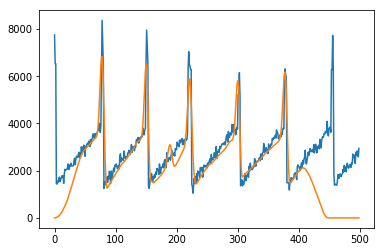

(173, 612.0690316751007)


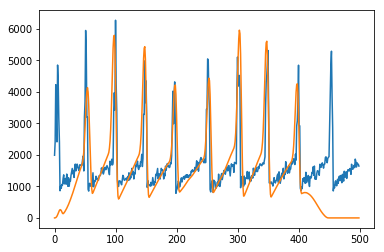

(174, 743.3509701724555)


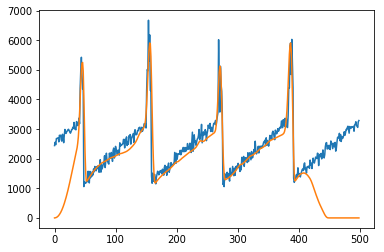

(175, 425.01461388789255)


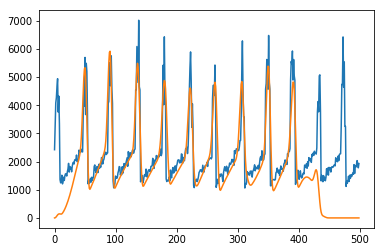

(176, 632.8017173160546)


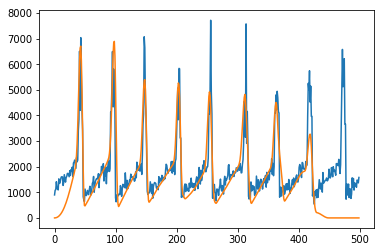

(177, 690.367655349613)


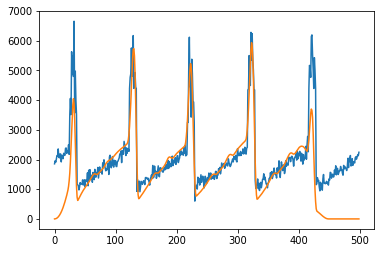

(178, 400.7389398619472)


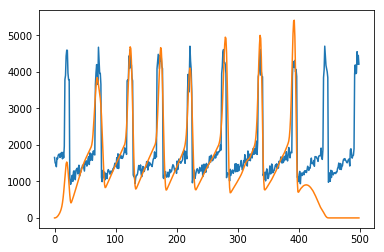

(179, 548.8967320260798)


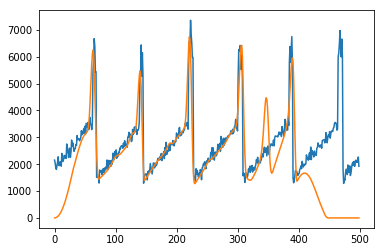

(180, 817.6186947542204)


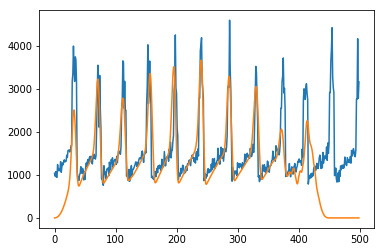

(181, 462.70926318654244)


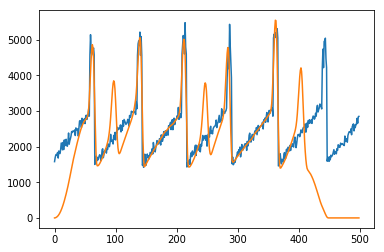

(182, 471.9472529544035)


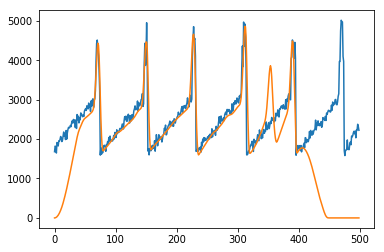

(183, 420.1755654716912)


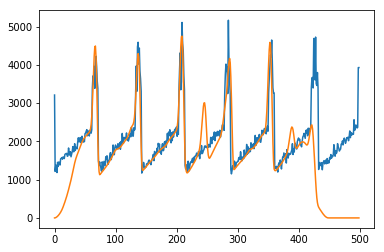

(184, 445.493705903784)


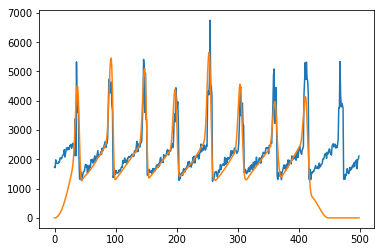

(185, 454.4894373754102)


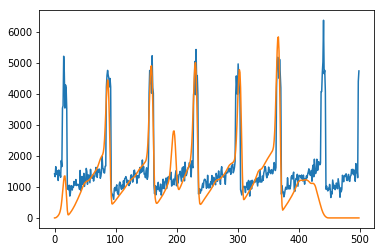

(186, 614.814956835199)


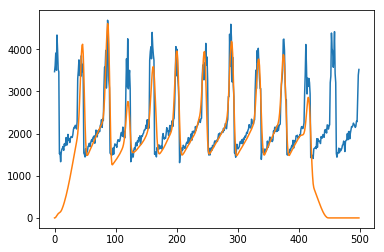

(187, 371.4479251537946)


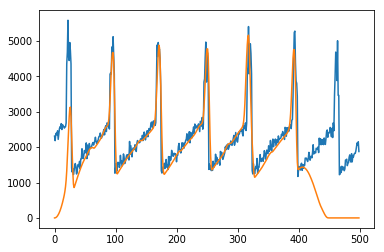

(188, 422.9692082783265)


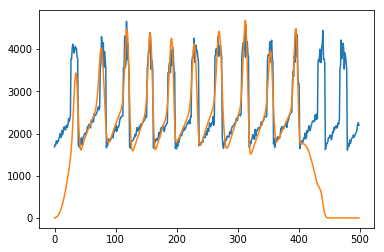

(189, 363.67276584369233)


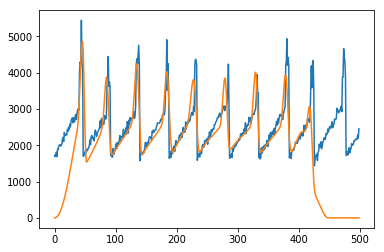

(190, 422.11725958720507)


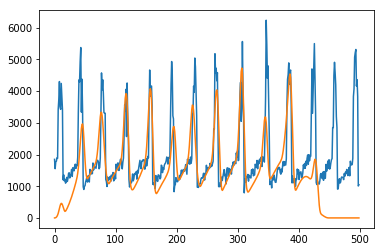

(191, 739.206459244447)


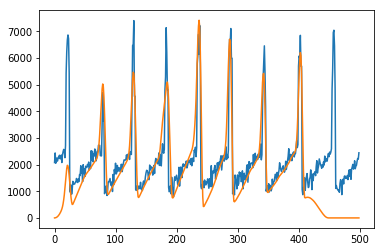

(192, 761.4587514498675)


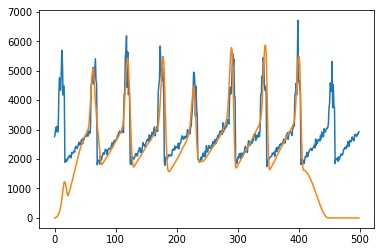

(193, 585.0089443281606)


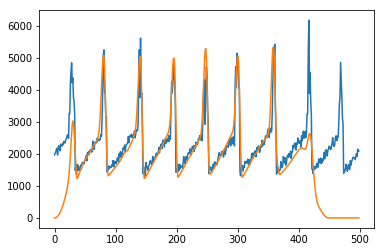

(194, 391.6311061307514)


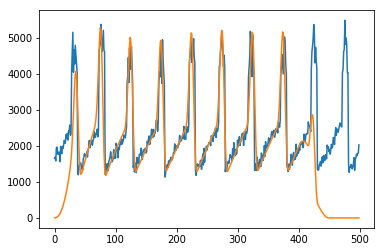

(195, 455.72538443819195)


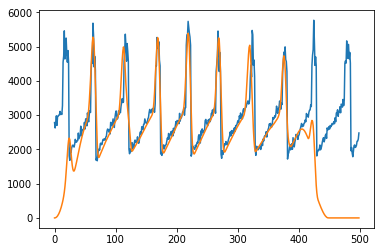

(196, 521.4262598181365)


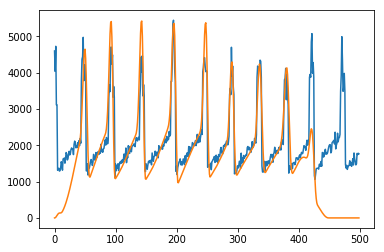

(197, 430.253981464955)


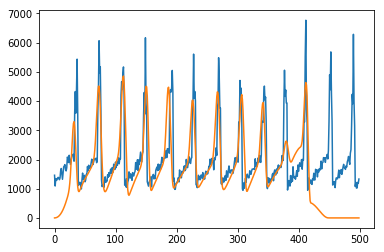

(198, 858.0141113192919)


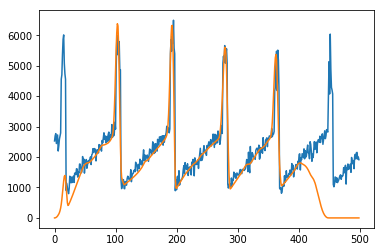

(199, 496.6268387121874)


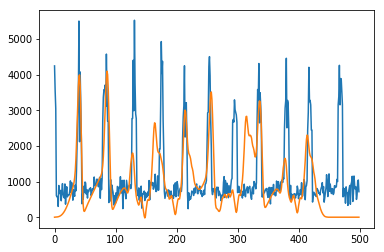

(200, 991.0300355616732)


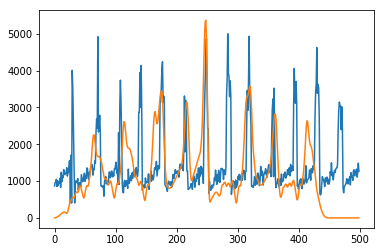

(201, 1014.0401180294538)


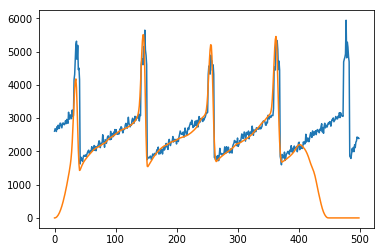

(202, 379.0718224427702)


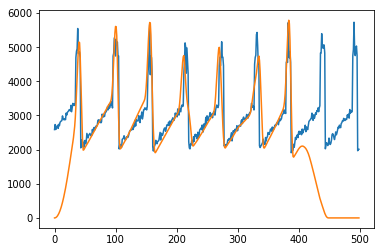

(203, 532.0573168787121)


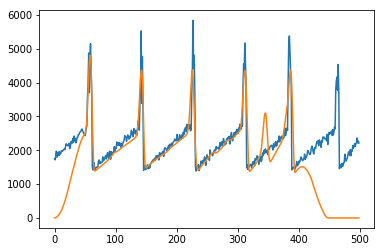

(204, 422.7705145060819)


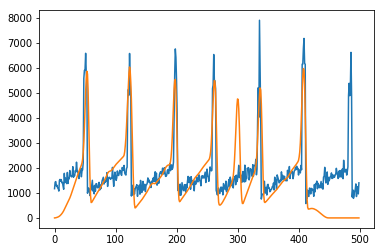

(205, 839.6287442846781)


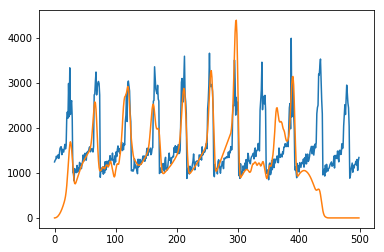

(206, 521.9962174545433)


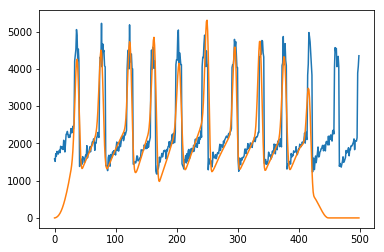

(207, 599.3801576516771)


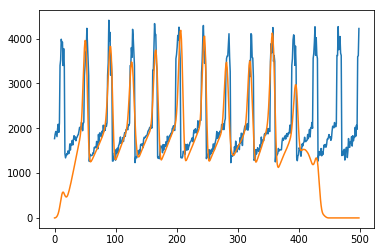

(208, 564.7822416834967)


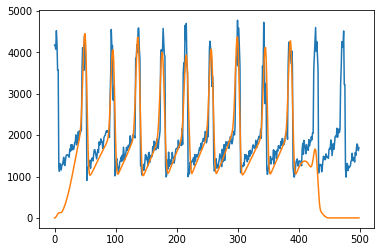

(209, 446.4773443353865)


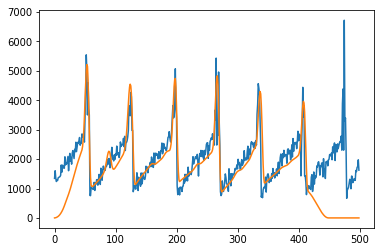

(210, 507.5046939599058)


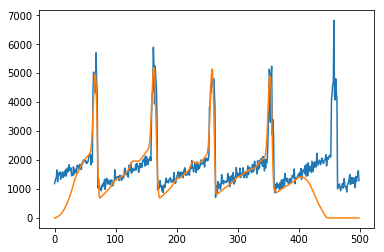

(211, 396.91928980411836)


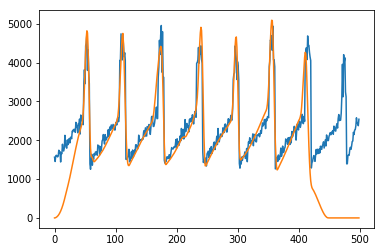

(212, 353.1470800288162)


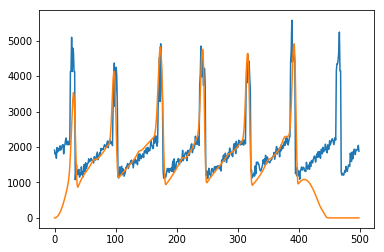

(213, 452.27702292949334)


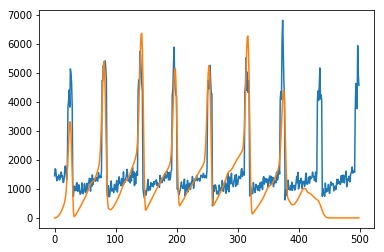

(214, 742.1666188735034)


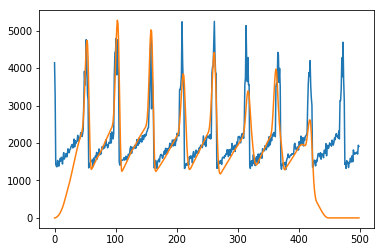

(215, 520.4128156695459)


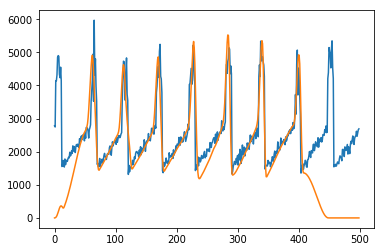

(216, 501.0267938569187)


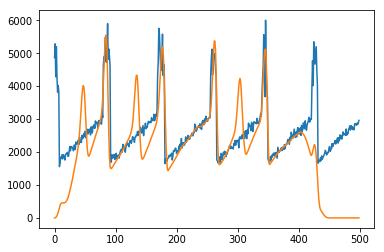

(217, 556.6926417301638)


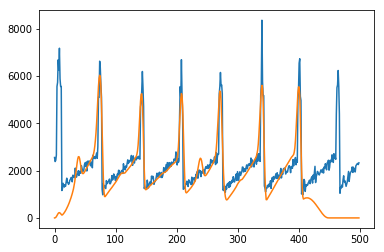

(218, 574.2021568681265)


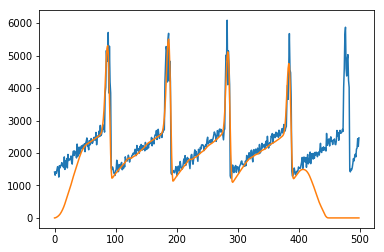

(219, 293.1726226745323)


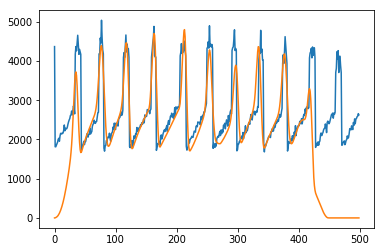

(220, 505.33668073979277)


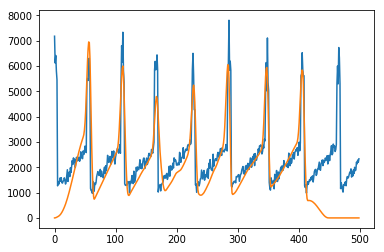

(221, 755.4524148728265)


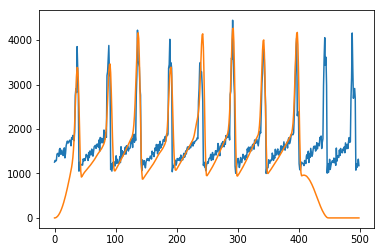

(222, 402.25437716039295)


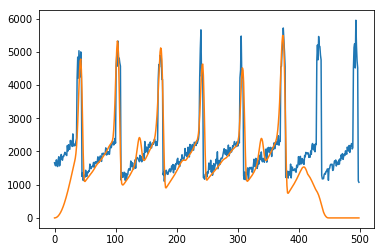

(223, 557.8750570558317)


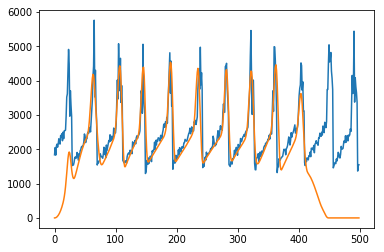

(224, 480.5635607628626)


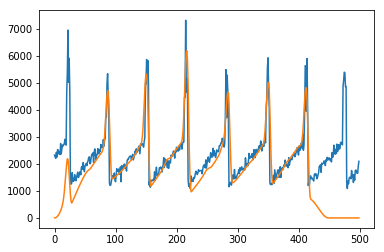

(225, 551.7353067164568)


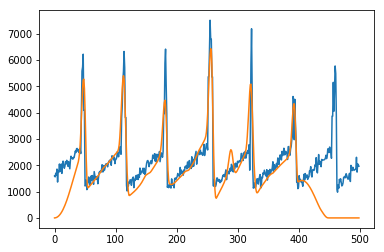

(226, 561.9017598885764)


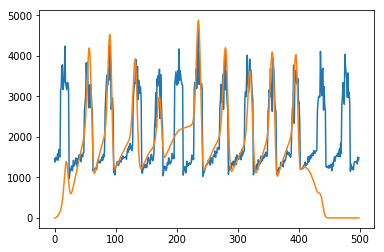

(227, 610.7373817126182)


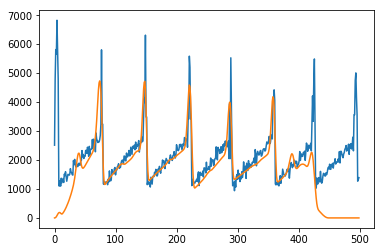

(228, 410.566923414397)


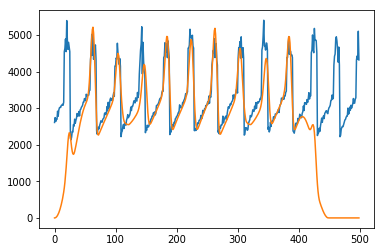

(229, 437.743502912898)


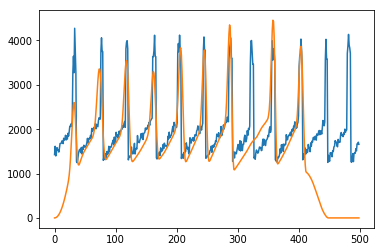

(230, 545.8681467911769)


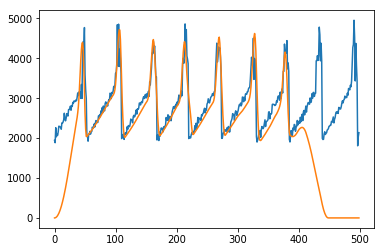

(231, 353.9067714356824)


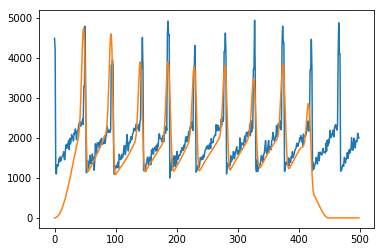

(232, 513.914419138477)


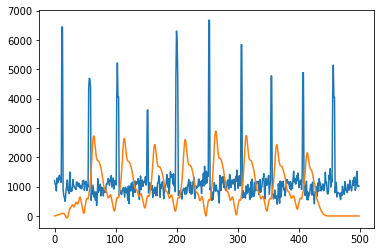

(233, 1351.8697722033492)


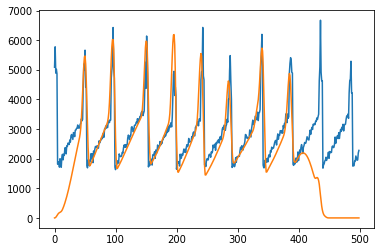

(234, 632.966705297848)


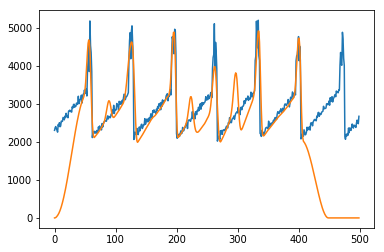

(235, 394.5050082084319)


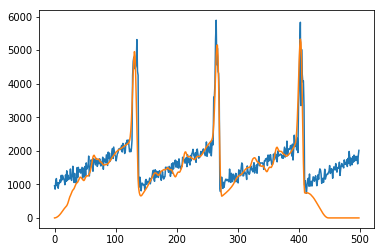

(236, 400.6573863339528)


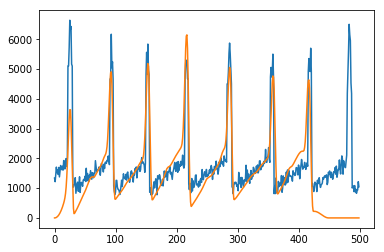

(237, 575.27357921434)


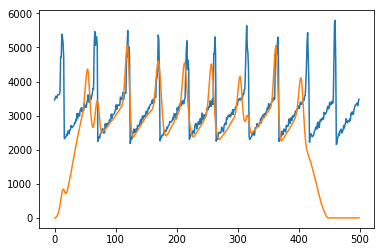

(238, 545.5760515654224)


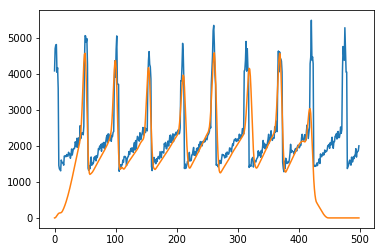

(239, 562.5426454543111)


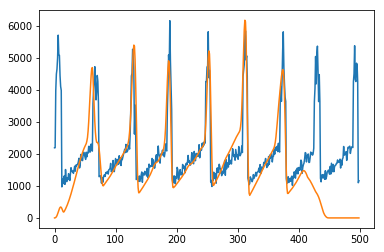

(240, 556.2305241525185)


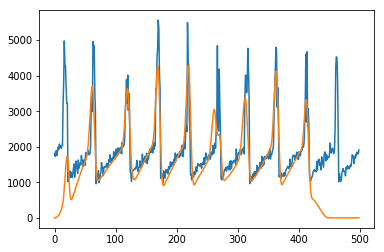

(241, 499.9201970460354)


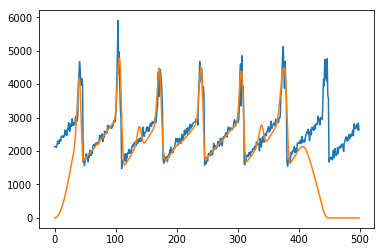

(242, 342.9057863605543)


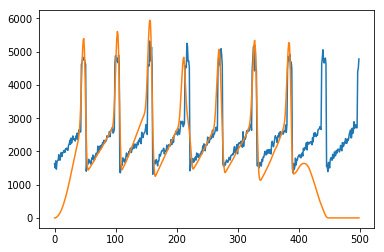

(243, 601.0127292901046)


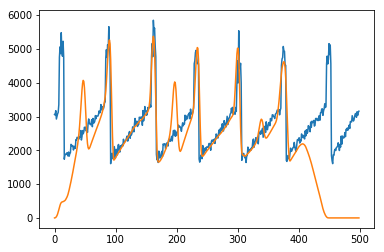

(244, 470.6924437464111)


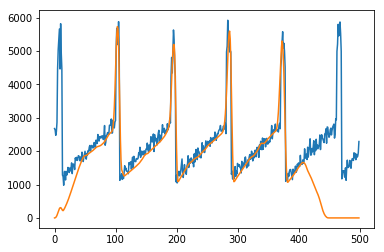

(245, 404.8530491512376)


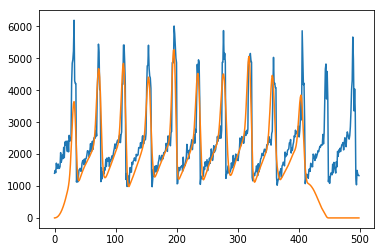

(246, 598.8628569054275)


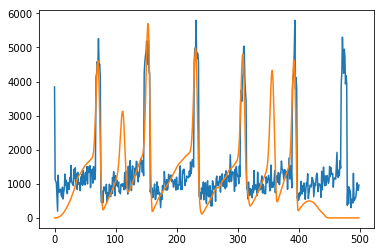

(247, 831.2626705202671)


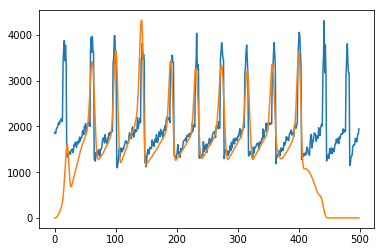

(248, 468.0793047240214)


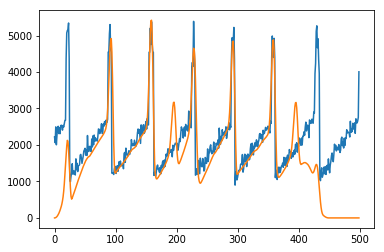

(249, 467.458086464124)


In [67]:
importlib.reload(sc)
### reconstruction: complete for every validation observation in leave-one-out. Then do once for lcs of all other classes
for n_rho, rho in enumerate(rho_valid):
#     rho=np.vstack((np.array(range(0,500)),rho))
    valid_segments= sc.segmentation(rho, 100, int(100/2) , time_stamps=False)
    
    reco = sc.reconstruct(valid_segments, rho, cluster, rel_offset=False, seg_slide=50)
    error=np.sqrt(np.mean((rho[100:-100]-reco[100:-100])**2))
#     error=np.sqrt(np.mean((rho[1][100:-100]-reco[1][100:-100])**2))
#     plt.plot(rho[0],rho[1])
#     plt.plot(reco[0],reco[1])
#     plt.show()
    plt.plot(rho)
    plt.plot(reco)
    plt.show()
    print((n_rho, error), flush=True)

In [65]:
error=np.sqrt(np.mean((rho[100:-100]-reco[100:-100])**2))
np.sqrt(np.mean((rho-reco)**2))

1114.494282573506

In [69]:
import importlib
import os
import fnmatch
import numpy as np
from sklearn.model_selection import train_test_split
from collections import Counter
import csv
from sklearn import tree
import sys
sys.stdout.flush()
import math
import matplotlib.pyplot as plt
from matplotlib.table import Table
import segment_cluster as sc
import importlib
importlib.reload(sc)
from sklearn.cluster import KMeans
import pandas as pd

np.random.seed(0)

cwd = os.getcwd()
if cwd.split("/")[1] == "home":
    data_path="/home/jkok1g14/Documents/GRS1915+105/data/Std1_PCU2"
elif cwd.split("/")[1] == "export":
    data_path="/export/data/jakubok/GRS1915+105/Std1_PCU2"
else:
    print("Set the path of data directory!", Flush=True)

#creates a dictionary of observation_ID: "state" items for labeled observations
clean_belloni = open('1915Belloniclass_updated.dat')
lines = clean_belloni.readlines()
states = lines[0].split()
belloni_clean = {}
for h,l in zip(states, lines[1:]):
    belloni_clean[h] = l.split()
    #state: obsID1, obsID2...
ob_state = {}
for state, obs in belloni_clean.items():
    if state == "chi1" or state == "chi2" or state == "chi3" or state == "chi4": state = "chi"
    for ob in obs:
        ob_state[ob] = state

#creates a list of labeled observations with abailable data
available = []
pool=[]
#/home/jkok1g14/Documents/GRS1915+105/data
#/export/data/jakubok/GRS1915+105/Std1_PCU2
for root, dirnames, filenames in os.walk(data_path):
    for filename in fnmatch.filter(filenames, "*_std1_lc.txt"):
        available.append(filename)
for ob, state in ob_state.items():
    if ob+"_std1_lc.txt" in available:
        pool.append(ob)  

#create a list of arrays with time and counts for the set of Belloni classified observations
lc_dirs=[]
lcs=[]
ids=[]
for root, dirnames, filenames in os.walk(data_path):    
    for filename in fnmatch.filter(filenames, "*_std1_lc.txt"):
        if filename.split("_")[0] in pool:
            lc_dirs.append(os.path.join(root, filename))

            
#make 2D arrays for light curves, with columns of counts and time values
for lc in lc_dirs:
    ids.append(lc.split("/")[-1].split("_")[0])
    f=np.loadtxt(lc)
    f=np.transpose(f)#,axis=1)
    f=f[0:2]
    ###1s average and time check to eliminate points outside of GTIs
    f8t = np.mean(f[0][:(len(f[0])//8)*8].reshape(-1, 8), axis=1)
    f8c = np.mean(f[1][:(len(f[1])//8)*8].reshape(-1, 8), axis=1)
    #f8c=f8c-np.mean(f8c)#normalisation/mean centering/whatever you desire most
    rm_points = []
    skip=False
    for i in range(len(f8t)-1):
        if skip==True:
            skip=False
            continue
        delta = f8t[i+1]-f8t[i]
        if delta > 1.0:
            rm_points.append(i+1)
            skip=True   
    times=np.delete(f8t,rm_points)
    counts=np.delete(f8c,rm_points)
    lcs.append(np.stack((times,counts)))
#a list of light curve 2D arrays

lc_classes=[]
for i in ids:
    lc_classes.append(ob_state[i])

drop_classes=[]
for clas, no in Counter(lc_classes).items():
    if no<7:
        drop_classes.append(clas)

lcs_abu = []
classes_abu = []
ids_abu = []
for n, lc in enumerate(lc_classes):
    if lc not in drop_classes:
        classes_abu.append(lc)
        lcs_abu.append(lcs[n])
        ids_abu.append(ids[n])  
#a list of light curve 2D arrays of classes with at least 7 light curves
x_train, x_test, y_train, y_test, id_train, id_test = train_test_split(lcs_abu, classes_abu, ids_abu, test_size=0.25, stratify=classes_abu)

rho_file=np.loadtxt("synthetic_rhos.csv", delimiter=',')
rho_train, rho_valid, rho_train_ids, rho_valid_ids= train_test_split(rho_file, list(range(len(rho_file))) ,test_size=0.25)

#lists for the validation results 
#numbers of clusters and segment lengths to be tested
reco_error=[]
#reco_classes=[]
k_clusters=[5, 25, 50]
seg_lens=[8, 60, 100]
classes=list(set(y_train))
print(classes, flush=True)
for k_id, k_cluster in enumerate(k_clusters):
    for len_id, seg_len in enumerate(seg_lens):
        # calculate the slide values
        seg_slides=[1, int(seg_len/4),int(seg_len/2)]
        for slide_id, seg_slide in enumerate(seg_slides):data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAagAAAEYCAYAAAAJeGK1AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAGN1JREFUeJzt3VGMXXXZ7/HvA0LyChiKDobQNtjoCyEmSp0oBGNy8LyI1UDfhAtIRIKYuSCY8kZCaIxX54JoDIqJc9FYGowELgC1MVFoFGJMSmOHFgRGoW1M2lgtHESIMVHCcy5mtWd3uvfMWrDW7P/a8/0kO7P2f9bs/fzX/IaHNV3zX5GZSJJUmtPGXYAkScPYoCRJRbJBSZKKZIOSJBXJBiVJKpINSpJUpFoNKiLOjYhHIuIPETEfEVd0XZj6y7yoKTOjYd5Tc7/7gF9m5vURcSbw3g5rUv+ZFzVlZnSKWO4PdSPifcCzwIb0r3q1DPOipsyMRqlzBrUBeAXYEREfA+aALZn5j8GdImIGmAE466yzPnHJJZe0XataMDc392pmTnX4FuZlwpSQGfPSH23mpc4Z1DTwNHBlZu6JiPuANzLzm6O+Znp6Ovfu3dtGfWpZRMxl5nSHr29eJkxpmTEvZWszL3UukjgCHMnMPdXzR4CNbby5JpJ5UVNmRkMt26Ay8y/A4Yi4uBr6LPBip1Wpt8yLmjIzGqXuVXxfAx6srq45BNzSXUmaAOZFTZkZnaJWg8rM/UBnv4PWZDEvasrMaBhXkpAkFckGJUkqkg1KklQkG5QkqUh1r+KTpFVh647NAFz79ocBuOLW74yznFXNMyhJUpFsUJKkItmgJElFskFJkopkg5IkFckGJUkqUu0GFRGnR8S+iPh5lwVpMpgXNWVmtFiTM6gtwHxXhWjimBc1ZWZ0kloNKiLWAl8AfthtOZoE5kVNmRkNU/cM6nvAXcDbHdaiyWFe1JSZ0SmWbVAR8UXgWGbOLbPfTETsjYi9r7zySmsFql/6lpfZn9x4YmkbgNn9s8zunx1bPatRncyUkhetrDpnUFcC10bEn4CHgasi4seLd8rMbZk5nZnTU1NTLZepHjEvamrZzJiX1WnZBpWZWzNzbWZeBNwA/Dozv9R5Zeol86KmzIxG8e+gJElFanS7jcx8Cniqk0o0ccyLmjIzGuQZlCSpSDYoSVKRbFCSpCLZoCRJRbJBSZKK1OgqvtVq9/Y72XnaAQDWXXb1ifHD+57g2rc/DMAVt37npP0Xj6kssz+5kcOv//OU8cP7nljY+PhtK1yRSnP8Z/6KMdexmnkGJUkqkg1KklQkG5QkqUg2KElSkWxQkqQi2aAkSUWqc8PCdRHxZETMR8QLEbFlJQpTP5kXNWVmNEqdv4N6C/h6Zj4TEecAcxGxKzNf7Lg29ZN5UVNmRkPVuWHh0cx8ptp+E5gHLuy6MPWTeVFTZkajNFpJIiIuAi4D9gz53AwwA7B+/foWSmvX4tUgbqtWChg1PsqJlQYqx7923/7Z/7/PorHlXnNSlZKXrTs2A3DPLT8duc/x1T/8V9nxGpWZrvIymI3ZgZ/hQbP7Z4f+DM/unz2xmoyrxnSj9o9jRJwNPArckZlvLP58Zm7LzOnMnJ6ammqzRvWQeVFTS2XGvKxOtRpURJzBQnAezMzHui1JfWde1JSZ0TB1ruILYDswn5n3dl+S+sy8qCkzo1HqnEFdCdwEXBUR+6vHpo7rUn+ZFzVlZjTUshdJZOZvgViBWjQBzIuaMjMaxWuWJElFskFJkopkg5IkFckGJUkqUqOVJFaTwRUm6rTxxStMqF9OfK8rx1cYWGyp1SjUX6O+37Dws7177pCrRYyBZ1CSpCLZoCRJRbJBSZKKZIOSJBXJBiVJKpINSpJUpLq327gmIv4YEQci4u6ui1K/mRc1ZWY0TJ3bbZwO/AD4PHApcGNEXNp1Yeon86KmzIxGqXMG9UngQGYeysx/AQ8D13VblnrMvKgpM6OhIjOX3iHieuCazPxq9fwm4FOZefui/WaAmerpR4Hn2y93LD4AvDruIlp0cWae09WLmxfAzDRSJzPmpVday0udpY6G3afllK6WmduAbQARsTczp99lbUWYpLnAwny6foshY6smLzCZ8+n6LYaMnZQZ89Ifbealzq/4jgDrBp6vBf7cVgGaOOZFTZkZDVWnQf0O+EhEfCgizgRuAHZ2W5Z6zLyoKTOjoerc8v2tiLgdeBw4Hbg/M19Y5su2tVFcISZpLtDxfMwL4HwaeQeZ8fiWrbX5LHuRhCRJ4+BKEpKkItmgJElFarVB9WW5koi4PyKORcTzA2PnRcSuiHi5+rimGo+I+H41p+ciYuPA19xc7f9yRNw8prmsi4gnI2I+Il6IiC19mY95GQ8z071JysxY85KZrTxY+MfNg8AG4EzgWeDStl6/zQfwGWAj8PzA2LeBu6vtu4FvVdubgF+w8LcalwN7qvHzgEPVxzXV9poxzOUCYGO1fQ7wEgvLxRQ9H/MynryYGTPTp7y0eQbVm+VKMvM3wGuLhq8DHqi2HwA2D4z/KBc8DZwbERcAnwN2ZeZrmfk3YBdwTffVnywzj2bmM9X2m8A8cCHlz8e8jCEvYGZWwiRlZpx5abNBXQgcHnh+pBrriw9m5lFY+IYA51fjo+ZV3Hwj4iLgMmAP5c+nuOPXUOnHtxYzs6JKP77LWum8tNmgai1x00Oj5lXUfCPibOBR4I7MfGOpXYeMjWM+RR2/FpVyfJdlZopRyvFd0jjy0maD6vtyJX+tTkOpPh6rxkfNq5j5RsQZLATnwcx8rBoufT7FHL93qPTjuyQzMxalH9+RxpWXNhtU35cr2Qkcv6rkZuBnA+Nfrq5MuRz4e3U6+zhwdUSsqa5euboaW1EREcB2YD4z7x34VOnzMS9jyAuYmTEq/fgONda8tHy1xyYWrvA4CHyjzdduuc6HgKPAv1no6rcC7wd+BbxcfTyv2jdYuJnaQeD3wPTA63wFOFA9bhnTXD7Nwmnyc8D+6rGpD/MxL2Obj5kxM73Ii0sdSZKK5EoSkqQi2aAkSUWyQUmSimSDkiQVyQYlSSqSDUqSVCQblCSpSDYoSVKRbFCSpCLZoCRJRbJBSZKKZIOSJBWpVoOKiHMj4pGI+ENEzEfEFV0Xpv4yL2rKzGiY99Tc7z7gl5l5fXUflvd2WJP6z7yoKTOjUyx7u42IeB/wLLAhvTeHlmFe1JSZ0Sh1zqA2AK8AOyLiY8AcsCUz/zG4U0TMADMAZ5111icuueSStmtVC+bm5l7NzKkO38K8TJgSMrOSeXnl9UMATJ27obP3mGRt5qXOGdQ08DRwZWbuiYj7gDcy85ujvmZ6ejr37t3bRn1qWUTMZeZ0h69vXiZMaZnpOi+zP7kRgNv++6HO3mOStZmXOhdJHAGOZOae6vkjwMY23lwTybyoKTOjoZZtUJn5F+BwRFxcDX0WeLHTqtRb5kVNmRmNUvcqvq8BD1ZX1xwCbumuJE0A86KmzIxOUatBZeZ+oLPfQWuymBc1ZWY0jCtJSJKKZIOSJBXJBiVJKpINSpJUpLpX8UnSqnD49X+OuwRVPIOSJBXJBiVJKpINSpJUJBuUJKlINihJUpFsUJKkItVuUBFxekTsi4ifd1mQJoN5UVNmRos1OYPaAsx3VYgmjnlRU2ZGJ6nVoCJiLfAF4IfdlqNJYF7UlJnRMHXPoL4H3AW8PWqHiJiJiL0RsfeVV15ppTj1Vm/yctOj/4etOzbDk/eMrQYBy2RmHHn57q6X+O6ul1bkvTTcsg0qIr4IHMvMuaX2y8xtmTmdmdNTU1OtFah+MS9qqk5mzMvqVOcM6krg2oj4E/AwcFVE/LjTqtRn5kVNmRkNtWyDysytmbk2My8CbgB+nZlf6rwy9ZJ5UVNmRqP4d1CSpCI1ut1GZj4FPNVJJZo45kVNmRkN8gxKklQkG5QkqUg2KElSkWxQkqQiNbpIYrXavf1Odp52AIB1l10NwOF9TwBw7dsf5opbvzO22vTObd2xmbXV9uzrz8H+WS6bOwTg91QcO3IX56/99rjLWNU8g5IkFckGJUkqkg1KklQkG5QkqUg2KElSkWxQkqQi1bkf1LqIeDIi5iPihYjYshKFqZ/Mi5oyMxqlzt9BvQV8PTOfiYhzgLmI2JWZL3Zcm/rJvKgpM6Oh6twP6mhmPlNtvwnMAxd2XZj6ybyoKTOjURqtJBERFwGXAXuGfG4GmAFYv359C6W1a3b/7InVH+655acnxhevEnHbx29b8nWOv8ZxO087wM4dm4fue3zVieVec1KVkpet1fdn8Pu+2OHX/wn7nuBw9b9sV3RakUYZlZmu8rJ7+50A7PvEhpE/p9/d9RL/81//ecp4nVzp3al9kUREnA08CtyRmW8s/nxmbsvM6cycnpqaarNG9ZB5UVNLZca8rE61GlREnMFCcB7MzMe6LUl9Z17UlJnRMHWu4gtgOzCfmfd2X5L6zLyoKTOjUeqcQV0J3ARcFRH7q8emjutSf5kXNWVmNNSyF0lk5m+BWIFaNAHMi5oyMxrFlSQkSUWyQUmSimSDkiQVyQYlSSpSo5UkVpPBFSZs46vP1hGrg7hqwGQ58TO+7wBbF60SA3DsyF0AzP7kPwC47b8fWrHa5H96JUmFskFJkopkg5IkFckGJUkqkg1KklQkG5QkqUh1b7dxTUT8MSIORMTdXRelfjMvasrMaJg6t9s4HfgB8HngUuDGiLi068LUT+ZFTZkZjVLnDOqTwIHMPJSZ/wIeBq7rtiz1mHlRU2ZGQ0VmLr1DxPXANZn51er5TcCnMvP2RfvNADPV048Cz7df7lh8AHh13EW06OLMPKerFzcvgJlppE5mzEuvtJaXOksdDbtPyyldLTO3AdsAImJvZk6/y9qKMElzgYX5dP0WQ8ZWTV5gMufT9VsMGTspM+alP9rMS51f8R0B1g08Xwv8ua0CNHHMi5oyMxqqToP6HfCRiPhQRJwJ3ADs7LYs9Zh5UVNmRkPVueX7WxFxO/A4cDpwf2a+sMyXbWujuEJM0lyg4/mYF8D5NPIOMuPxLVtr81n2IglJksbBlSQkSUWyQUmSitRqg+rLciURcX9EHIuI5wfGzouIXRHxcvVxTTUeEfH9ak7PRcTGga+5udr/5Yi4eUxzWRcRT0bEfES8EBFb+jIf8zIeZqZ7k5SZseYlM1t5sPCPmweBDcCZwLPApW29fpsP4DPARuD5gbFvA3dX23cD36q2NwG/YOFvNS4H9lTj5wGHqo9rqu01Y5jLBcDGavsc4CUWlospej7mZTx5MTNmpk95afMMqjfLlWTmb4DXFg1fBzxQbT8AbB4Y/1EueBo4NyIuAD4H7MrM1zLzb8Au4Jruqz9ZZh7NzGeq7TeBeeBCyp+PeRlDXsDMrIRJysw489Jmg7oQODzw/Eg11hcfzMyjsPANAc6vxkfNq7j5RsRFwGXAHsqfT3HHr6HSj28tZmZFlX58l7XSeWmzQdVa4qaHRs2rqPlGxNnAo8AdmfnGUrsOGRvHfIo6fi0q5fguy8wUo5Tju6Rx5KXNBtX35Ur+Wp2GUn08Vo2Pmlcx842IM1gIzoOZ+Vg1XPp8ijl+71Dpx3dJZmYsSj++I40rL202qL4vV7ITOH5Vyc3AzwbGv1xdmXI58PfqdPZx4OqIWFNdvXJ1NbaiIiKA7cB8Zt478KnS52NexpAXMDNjVPrxHWqseWn5ao9NLFzhcRD4Rpuv3XKdDwFHgX+z0NVvBd4P/Ap4ufp4XrVvsHAztYPA74Hpgdf5CnCgetwyprl8moXT5OeA/dVjUx/mY17GNh8zY2Z6kReXOpIkFcmVJCRJRbJBSZKKZIOSJBXJBiVJKpINSpJUJBuUJKlINihJUpFsUJKkItmgJElFskFJkopkg5IkFckGJUkqUq0GFRHnRsQjEfGHiJiPiCu6Lkz9ZV7UlJnRMO+pud99wC8z8/rqPizv7bAm9Z95UVNmRqdY9nYbEfE+4FlgQ3pvDi3DvKgpM6NR6pxBbQBeAXZExMeAOWBLZv5jcKeImAFmAM4666xPXHLJJW3XqhbMzc29mplTHb6FeZkwJWTGvPRHm3mpcwY1DTwNXJmZeyLiPuCNzPzmqK+Znp7OvXv3tlGfWhYRc5k53eHrm5cJU1pmzEvZ2sxLnYskjgBHMnNP9fwRYGMbb66JZF7UlJnRUMs2qMz8C3A4Ii6uhj4LvNhpVeot86KmzIxGqXsV39eAB6uraw4Bt3RXkiaAeVFTZkanqNWgMnM/0NnvoDVZzIuaMjMaxpUkJElFskFJkopkg5IkFckGJUkqkg1Kq9bs/tlxl6ACbd2xmd3b7xx3GcIGJUkqlA1KklQkG5QkqUg2KElSkWxQkqQi2aAkSUWq3aAi4vSI2BcRP++yIE0G86KmzIwWa3IGtQWY76oQTRzzoqbMjE5Sq0FFxFrgC8APuy1Hk8C8qCkzo2Hq3g/qe8BdwDmjdoiIGWAGYP369e++sp4YXI3gto/fNsZKitKbvHx310sA/M9//efYahCwTGZKyYtW1rJnUBHxReBYZs4ttV9mbsvM6cycnpqaaq1A9Yt5UVN1MmNeVqc6v+K7Erg2Iv4EPAxcFRE/7rQq9Zl5UVNmRkMt26Ayc2tmrs3Mi4AbgF9n5pc6r0y9ZF7UlJnRKP4dlCSpSHUvkgAgM58CnuqkEk0c86KmzIwGeQYlSSqSDUqSVCQblCSpSDYoSVKRbFCSpCI1uopvtdq9/U52nnYAgHWXXX1iSaPd2+/k8MC4+uP49+78tf8bgK07NgNwzy0/HWdZKsTO0w6wc8fmEz/XLmM2Hp5BSZKKZIOSJBXJBiVJKpINSpJUJBuUJKlIde4HtS4inoyI+Yh4ISK2rERh6ifzoqbMjEapc5n5W8DXM/OZiDgHmIuIXZn5Yse1qZ/Mi5oyMxqqzv2gjmbmM9X2m8A8cGHXhamfzIuaMjMapdG/QUXERcBlwJ4uitFkMS9qysxoUO2VJCLibOBR4I7MfGPI52eAGYD169e3VmBbZvfPcnjfEwBc+/aHueLW75z43PFVBGD5lQQO73uC3XOHho5vrV5/0ODKE6tJSXk5aZWIJ+856XPHjtw1el+tqKUy01Vetu7YfOK/B7u337kwOPC/7bsP/l8Abvv40l+rbtQ6g4qIM1gIzoOZ+diwfTJzW2ZOZ+b01NRUmzWqZ8yLmlouM+ZldapzFV8A24H5zLy3+5LUZ+ZFTZkZjVLnDOpK4CbgqojYXz02dVyX+su8qCkzo6GW/TeozPwtECtQiyaAeVFTZkajuJKEJKlINihJUpFsUJKkItmgJElFskFJkopUeyWJ1ejEChOL2vjO0w6sfDFaUYOriwxyhYnJs/O0A+zcsXno/66vfWNuYeP4CiT/a+vKFSbPoCRJZbJBSZKKZIOSJBXJBiVJKpINSpJUJBuUJKlIde8HdU1E/DEiDkTE3V0XpX4zL2rKzGiYOveDOh34AfB54FLgxoi4tOvC1E/mRU2ZGY1S5wzqk8CBzDyUmf8CHgau67Ys9Zh5UVNmRkNFZi69Q8T1wDWZ+dXq+U3ApzLz9kX7zQAz1dOPAs+3X+5YfAB4ddxFtOjizDynqxc3L4CZaaROZsxLr7SWlzpLHQ27kdgpXS0ztwHbACJib2ZOv8vaijBJc4GF+XT9FkPGVk1eYDLn0/VbDBk7KTPmpT/azEudX/EdAdYNPF8L/LmtAjRxzIuaMjMaqk6D+h3wkYj4UEScCdwA7Oy2LPWYeVFTZkZDLfsrvsx8KyJuBx4HTgfuz8wXlvmybW0UV4hJmgt0PB/zAjifRt5BZjy+ZWttPsteJCFJ0ji4koQkqUg2KElSkVptUH1ZriQi7o+IYxHx/MDYeRGxKyJerj6uqcYjIr5fzem5iNg48DU3V/u/HBE3j2ku6yLiyYiYj4gXImJLX+ZjXsbDzHRvkjIz1rxkZisPFv5x8yCwATgTeBa4tK3Xb/MBfAbYCDw/MPZt4O5q+27gW9X2JuAXLPytxuXAnmr8POBQ9XFNtb1mDHO5ANhYbZ8DvMTCcjFFz8e8jCcvZsbM9CkvbZ5B9Wa5ksz8DfDaouHrgAeq7QeAzQPjP8oFTwPnRsQFwOeAXZn5Wmb+DdgFXNN99SfLzKOZ+Uy1/SYwD1xI+fMxL2PIC5iZlTBJmRlnXtpsUBcChweeH6nG+uKDmXkUFr4hwPnV+Kh5FTffiLgIuAzYQ/nzKe74NVT68a3FzKyo0o/vslY6L202qFpL3PTQqHkVNd+IOBt4FLgjM99YatchY+OYT1HHr0WlHN9lmZlilHJ8lzSOvLTZoPq+XMlfq9NQqo/HqvFR8ypmvhFxBgvBeTAzH6uGS59PMcfvHSr9+C7JzIxF6cd3pHHlpc0G1fflSnYCx68quRn42cD4l6srUy4H/l6dzj4OXB0Ra6qrV66uxlZURASwHZjPzHsHPlX6fMzLGPICZmaMSj++Q401Ly1f7bGJhSs8DgLfaPO1W67zIeAo8G8WuvqtwPuBXwEvVx/Pq/YNFm6mdhD4PTA98DpfAQ5Uj1vGNJdPs3Ca/Bywv3ps6sN8zMvY5mNmzEwv8uJSR5KkIrmShCSpSDYoSVKRbFCSpCLZoCRJRbJBSZKKZIOSJBXJBiVJKtL/AwKZekvKB89cAAAAAElFTkSuQmCC
            #leave one out cross validation
            
            
            
            ##train the model
            #loop throught the light curves of a given class and segments them
            all_train_segments=[]
            for rho in rho_train:
                train_segments=sc.segmentation(rho, seg_len, seg_slide, time_stamps=False)
                all_train_segments.append(train_segments)
            all_train_segments=np.vstack(all_train_segments)
            #cluster the segments
            cluster=KMeans(n_clusters=k_cluster, random_state=0)
            cluster.fit(all_train_segments)

            ### reconstruction: complete for every validation observation in leave-one-out. Then do once for lcs of all other classes
            for n_rho, rho in enumerate(rho_valid):
                valid_segments= sc.segmentation(rho, seg_len, int(seg_len/2) , time_stamps=False)
                reco = sc.reconstruct(valid_segments, rho, cluster, rel_offset=False, seg_slide=int(seg_len/2))
                error=np.sqrt(np.mean((rho[seg_len:-seg_len]-reco[seg_len:-seg_len])**2))
                reco_error.append((k_id,len_id,slide_id,len(classes)+1, n_rho, error))
                print((k_id,len_id,slide_id,len(classes), n_rho, error), flush=True)
            
            
            
            #reconstruction loop through light curves for every class other than rho              
            for n_valid, valid_class in enumerate(classes):
                validation_ids=np.where(np.array(y_train)=='{}'.format(valid_class))[0]
                for ts_id in validation_ids:
                    valid_ts=x_train[ts_id]
                    valid_segments= sc.segmentation(valid_ts, seg_len, int(seg_len/2) , time_stamps=True)
                    reco = sc.reconstruct(valid_segments, valid_ts, cluster, rel_offset=False, seg_slide=int(seg_len/2))
                    error=np.sqrt(np.mean((valid_ts[1][seg_len:-seg_len]-reco[1][seg_len:-seg_len])**2))
                    reco_error.append((k_id,len_id,slide_id,n_valid,int(id_train[ts_id].replace("-","")), error))
                    print((k_id,len_id,slide_id,n_valid,int(id_train[ts_id].replace("-","")), error))
reco_error_ar=np.array(reco_error)
print(classes, flush=True)
np.savetxt("valid_results_20190425.csv", reco_error_ar, delimiter=",") 

['mu', 'kappa', 'delta', 'gamma', 'alpha', 'beta', 'theta', 'rho', 'chi', 'phi']
(0, 0, 0, 10, 0, 465.3718585605338)
(0, 0, 0, 10, 1, 420.73691513680467)
(0, 0, 0, 10, 2, 456.8353833501277)
(0, 0, 0, 10, 3, 478.91699993009826)
(0, 0, 0, 10, 4, 448.8045530199444)
(0, 0, 0, 10, 5, 441.8336213321825)
(0, 0, 0, 10, 6, 448.0952379008235)
(0, 0, 0, 10, 7, 459.94101016349305)
(0, 0, 0, 10, 8, 473.8120402728587)
(0, 0, 0, 10, 9, 427.42107579132596)
(0, 0, 0, 10, 10, 719.5014430855636)
(0, 0, 0, 10, 11, 486.31169232424554)
(0, 0, 0, 10, 12, 449.4614479081045)
(0, 0, 0, 10, 13, 611.4373350148418)
(0, 0, 0, 10, 14, 514.5983547839563)
(0, 0, 0, 10, 15, 558.5230689648765)
(0, 0, 0, 10, 16, 420.6477543272072)
(0, 0, 0, 10, 17, 466.16288640214606)
(0, 0, 0, 10, 18, 465.7610192870945)
(0, 0, 0, 10, 19, 454.1306020855785)
(0, 0, 0, 10, 20, 426.90127106730154)
(0, 0, 0, 10, 21, 429.1420880120743)
(0, 0, 0, 10, 22, 455.26903330764236)
(0, 0, 0, 10, 23, 436.3614805160486)
(0, 0, 0, 10, 24, 550.79273198247

KeyboardInterrupt: 

In [99]:
#plot histograms of error values for all classes except from rho
class_names=['delta', 'phi', 'mu', 'rho', 'beta', 'alpha', 'kappa', 'chi', 'gamma', 'theta']

results=np.loadtxt("valid_results_20190426.csv", dtype=float, delimiter=",")
results=results.reshape((3,3,3,401,6))
for k, clusters in enumerate(results):
    for l, length in enumerate(clusters):
        for s, slide in enumerate(length):# k, l and s are the three different hyperparameters validated
                class_errors_index=np.where(slide[:,3]==len(class_names)+1)[0]
                class_errors=slide[class_errors_index]
                min_synth=np.min(class_errors[:,-1])
                mean_synth=np.mean(class_errors[:,-1])
                print(k,l,s,"synthetic","\t",min_synth, mean_synth)
                neg_min_count=0
                neg_mean_count=0
                neg_min_total=0
                neg_mean_total=0
                total_neg_count=0
                for class_index, class_name in enumerate(class_names):
                    class_errors_index=np.where(slide[:,3]==class_index)[0]
                    class_errors=slide[class_errors_index]
                    neg_count=0
                    for observation in class_errors:
                        if observation[-1]<min_synth:
                            neg_count+=1
                    min_error=np.min(class_errors[:,-1])-min_synth
                    mean_error=np.mean(class_errors[:,-1])-mean_synth
                    print(k,l,s,class_name,"\t",min_error, mean_error, neg_count)
                    total_neg_count+=neg_count
                    if min_error<0:
                        neg_min_count+=1
                        neg_min_total+=min_error
                    if mean_error<0:
                        neg_mean_count+=1
                        neg_mean_total+=mean_error
                print("No. unseparated classes: ", neg_min_count, "No. low error classes: ", neg_mean_count)
                print("Total overlap: ", neg_min_total, "Total Mean error difference: ", neg_mean_total)
                print("Misclassified observations: ", total_neg_count)
                print()

0 0 0 synthetic 	 417.9786686627506 620.2037358398725
0 0 0 delta 	 309.70525159174247 438.35395200930066 0
0 0 0 phi 	 -129.19027958471338 -187.17929696714674 4
0 0 0 mu 	 546.6283376335332 576.7426499864773 0
0 0 0 rho 	 -15.561771688717272 20.174072882600512 1
0 0 0 beta 	 111.64585969239795 239.19271093456746 0
0 0 0 alpha 	 -176.41438058120164 -293.4140261149946 5
0 0 0 kappa 	 284.89972574558055 231.64931507456356 0
0 0 0 chi 	 -207.13113287472433 -136.05505530399995 32
0 0 0 gamma 	 426.1908553923066 370.6067400069795 0
0 0 0 theta 	 213.65971409393694 242.697997281546 0
No. unseparated classes:  4 No. low error classes:  3
Total overlap:  -528.2975647293566 Total Mean error difference:  -616.6483783861413
Misclassified observations:  42

0 0 1 synthetic 	 417.9786686627506 620.2037358398725
0 0 1 delta 	 309.70525159174247 438.35395200930066 0
0 0 1 phi 	 -129.19027958471338 -187.17929696714674 4
0 0 1 mu 	 546.6283376335332 576.7426499864773 0
0 0 1 rho 	 -15.561771688717272 2

/home/jkok1g14/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


delta 488.0557028289329


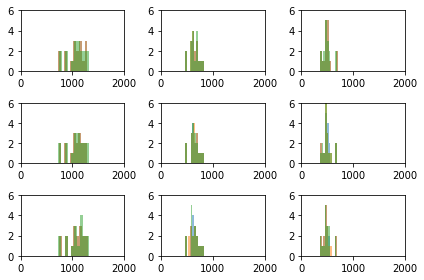

phi 195.07316388300913


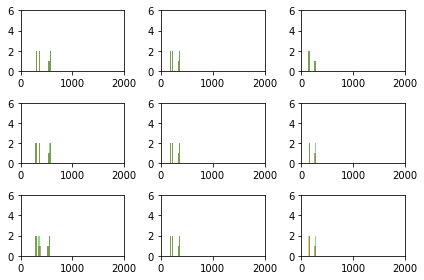

mu 716.0020096705756


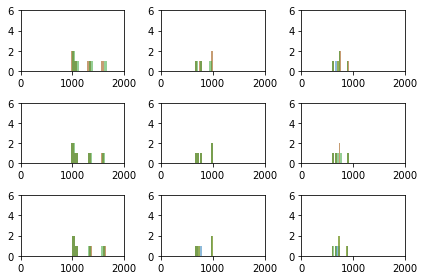

rho 371.3619826696129


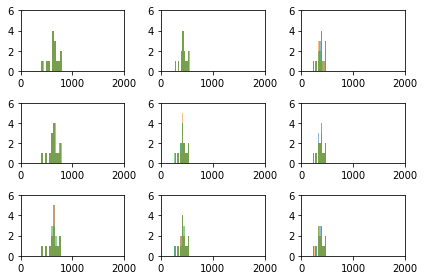

beta 501.18821472263943


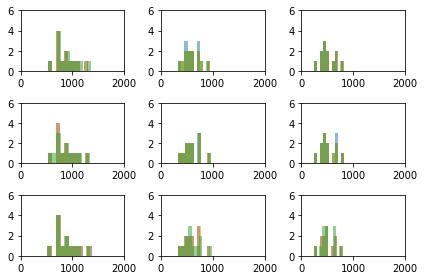

alpha 185.68785544096627


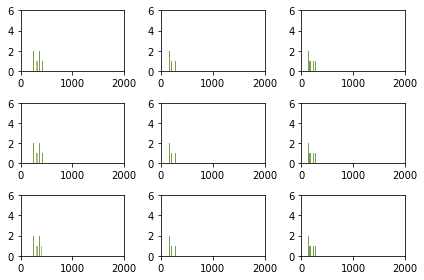

kappa 522.4076922188135


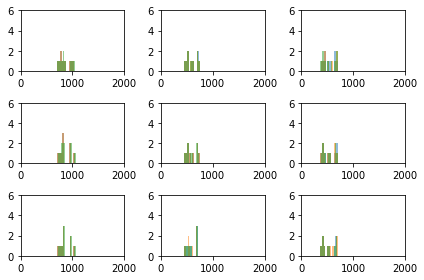

chi 255.00390749019826


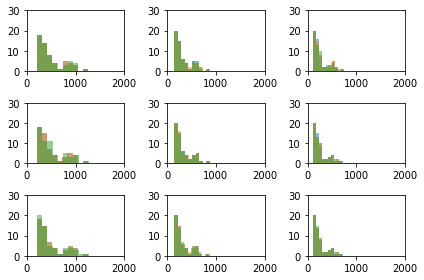

gamma 553.6789307248514


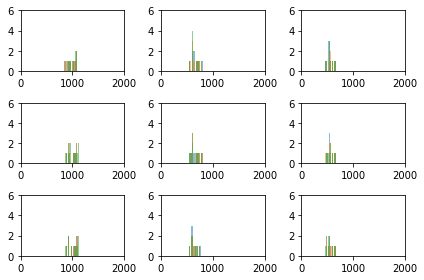

theta 484.2175637812884


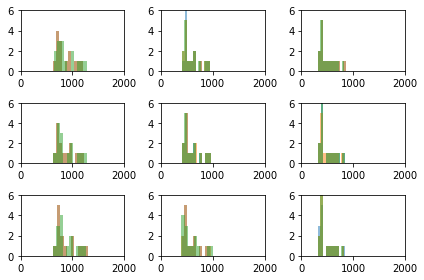

synthetic 313.3992669052627


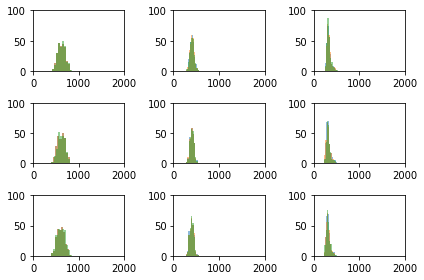

In [110]:
#plot histograms of error values for all classes except from rho
class_names=['delta', 'phi', 'mu', 'rho', 'beta', 'alpha', 'kappa', 'chi', 'gamma', 'theta',"synthetic"]
results=np.loadtxt("valid_results_20190426.csv", dtype=float, delimiter=",")
results=results.reshape((3,3,3,401,6))
for class_index, class_name in enumerate(class_names):
    n=0
    if class_index==10:
        class_index=11
    for k, clusters in enumerate(results):
        for l, length in enumerate(clusters):
            n+=1
            for s, slide in enumerate(length):# k, l and s are the three different hyperparameters validated
                errors=slide
                class_error_indices=np.where(slide[:,3]==class_index)[0]
                class_errors = errors[class_error_indices]
                #print(class_index,k,l,s,np.mean(class_errors[:,-1]))
                plt.subplot(3,3,n)
                plt.hist(class_errors[:,-1], alpha = 0.5)
                plt.xlim([0,2000])
                if class_index==7:
                    plt.ylim([0,30])
                elif class_index==11:
                    plt.ylim([0,100])
                else:
                    plt.ylim([0,6])
                
    print(class_name, np.mean(class_errors[:,-1]))
    plt.tight_layout()
    plt.show()

In [43]:
class_names=['alpha', 'phi', 'mu', 'theta', 'beta', 'delta', 'gamma', 'rho', 'chi', 'kappa']#,"synthetic"]
results=np.loadtxt("valid_results_20190430.csv", dtype=float, delimiter=",")
#results=results.reshape((3,3,3,401,6))
# for k, clusters in enumerate(results):
#     for l, length in enumerate(clusters):
#         for s, slide in enumerate(length):# k, l and s are the three different hyperparameters validated
class_errors_index=np.where(results[:,3]==11)[0]
class_errors=results[class_errors_index]
print(len(results[class_errors_index]))
min_synth=np.min(class_errors[:,-1])
mean_synth=np.mean(class_errors[:,-1])
print("synthetic","\t",min_synth, mean_synth)
neg_min_count=0
neg_mean_count=0
neg_min_total=0
neg_mean_total=0
total_neg_count=0
for class_index, class_name in enumerate(class_names):
    class_errors_index=np.where(results[:,3]==class_index)[0]
    class_errors=results[class_errors_index]
    print(len(results[class_errors_index]))
    neg_count=0
    for observation in class_errors:
        if observation[-1]<min_synth:
            neg_count+=1
    min_error=np.min(class_errors[:,-1])-min_synth
    mean_error=np.mean(class_errors[:,-1])-mean_synth
    print(class_name,"\t",min_error, mean_error, neg_count)
    total_neg_count+=neg_count
    if min_error<0:
        neg_min_count+=1
        neg_min_total+=min_error
    if mean_error<0:
        neg_mean_count+=1
        neg_mean_total+=mean_error
print("No. unseparated classes: ", neg_min_count, "No. low error classes: ", neg_mean_count)
print("Total overlap: ", neg_min_total, "Total Mean error difference: ", neg_mean_total)
print("Misclassified observations: ", total_neg_count)
print()

250
synthetic 	 93.69642550901146 214.92402815855493
6
alpha 	 7.169243049794659 -47.43178452718462 0
7
phi 	 -27.305160615738245 -86.02202356112687 2
5
mu 	 509.10104223614263 507.4501671622671 0
14
theta 	 183.05769490080735 271.1186802080209 0
12
beta 	 94.62837210334253 295.3994229159608 0
17
delta 	 141.7370308938751 145.69040422319003 0
9
gamma 	 247.63771916625313 303.9190504257731 0
14
rho 	 110.66057848027326 97.5805515391265 0
58
chi 	 -3.5700291781154903 -3.146687886101688 5
9
kappa 	 229.5233973721023 286.85416595146387 0
No. unseparated classes:  2 No. low error classes:  3
Total overlap:  -30.875189793853735 Total Mean error difference:  -136.60049597441318
Misclassified observations:  7



In [36]:
np.where(results[:,3]==len(class_names)+1)[0]

array([], dtype=int64)